In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Unemployment rate.csv')

# Data cleaning For Unemplyment Rate Factor

In [3]:
import pandas as pd

# Load the unemployment data
unemployment_data = pd.read_csv('Unemployment rate.csv', skiprows=5, names=['Date', 'Unemployment'])

# Define a function to convert the date strings to datetime objects representing the end of the period
def convert_date_string(date_string):
    # If the string contains 'Q', it represents a quarter
    if 'Q' in date_string:
        year, quarter = date_string.split(' Q')
        quarter = int(quarter)
        # Determine the last month of the quarter
        if quarter == 1:
            month = '03'
        elif quarter == 2:
            month = '06'
        elif quarter == 3:
            month = '09'
        elif quarter == 4:
            month = '12'
        return pd.to_datetime(f'{year}-{month}', format='%Y-%m')
    # If the string contains a space, it represents a specific month
    elif ' ' in date_string:
        month_dict = {'JAN': '01', 'FEB': '02', 'MAR': '03', 'APR': '04', 'MAY': '05', 'JUN': '06',
                      'JUL': '07', 'AUG': '08', 'SEP': '09', 'OCT': '10', 'NOV': '11', 'DEC': '12'}
        year, month = date_string.split(' ')
        month = month_dict[month]
        return pd.to_datetime(f'{year}-{month}', format='%Y-%m')
    # Otherwise, the string represents a year
    else:
        return pd.to_datetime(f'{date_string}-12', format='%Y-%m')

# Apply the function to the 'Date' column
unemployment_data['Date'] = unemployment_data['Date'].apply(convert_date_string)

# Grouping the data by year and calculating the mean for each year
unemployment_data["Year"] = unemployment_data['Date'].dt.year
unemployment_data_yearly = unemployment_data.groupby("Year").mean().reset_index()

# Save the yearly unemployment data to a CSV file
#unemployment_data_yearly.to_csv('unemployment_data_yearly.csv', index=False)


In [8]:
unemployment_data_yearly.tail()

,Year,Unemployment
48,2019,3.829412
49,2020,4.552941
50,2021,4.500000
51,2022,3.700000
52,2023,3.880000


#### Loadding England Churn File

In [5]:
C = pd.read_csv('A England.csv')
C.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
C.tail()

,HE PROVIDER,Total full-time entrants,Number who continue or qualify at same HEP,Percentage who continue or qualify at same HEP (%),Adjusted sector continue or qualify (%),Number who transfer to other UK HEP,Percentage who transfer to other UK HEP (%),Adjusted sector transfer to other UK HEP (%),Number no longer in HE,Percentage no longer in HE (%),Benchmark (%),Standard deviation (%),HE providers average contribution to benchmark (%),Average number of HE providers in comparison,County,Year,Location,Churn Level
1405,The University of Wolverhampton,4045,3415,0.44,86.8,150.0,3.7,3.2,480,11.9,10.0,0.44,3.2,95.3,England,2019-20,Wolverhampton,High
1406,University of Worcester,2255,2015,0.55,90.0,40.0,1.9,2.5,200,8.8,7.5,0.55,2.4,99.1,England,2019-20,Worcester,Moderate
1407,Writtle University College,195,175,1.68,89.4,5.0,2.6,2.7,15,6.7,7.9,1.68,5.2,42.7,England,2019-20,Chelmsford,Moderate
1408,York St John University,1825,1605,0.61,89.1,60.0,3.3,3.0,165,9.0,7.9,0.61,1.5,97.2,England,2019-20,York,Moderate
1409,The University of York,3735,3615,0.33,94.4,45.0,1.2,2.1,75,2.0,3.4,0.33,3.0,85.1,England,2019-20,York,Low


#### Finding the top 10 Universities

In [7]:
df = pd.read_csv("A England.csv")

# Group the data by university and calculate the sum of 'Number no longer in HE' for each university
university_churn_totals = df.groupby('HE PROVIDER')['Number no longer in HE'].sum()

# Sort the totals in descending order and select the top 10
top_10_universities_by_churn = university_churn_totals.sort_values(ascending=False).head(10)

top_10_universities_by_churn


HE PROVIDER
University of Bedfordshire                4260
Anglia Ruskin University                  3870
Leeds Beckett University                  3855
The University of Wolverhampton           3825
The Manchester Metropolitan University    3755
The University of Central Lancashire      3705
London Metropolitan University            3290
Birmingham City University                3250
Middlesex University                      3165
Liverpool John Moores University          3080
Name: Number no longer in HE, dtype: int64

# Data merging and manipulating 

#### Merging with the unemplyment rate csv (Indexing matching)

In [8]:
A = C[C['HE PROVIDER'] == 'University of Bedfordshire'][['Number no longer in HE','Year']] # For line plot

In [9]:
uni = C[C['HE PROVIDER'] == 'University of Bedfordshire'][['Number no longer in HE','Year']] 
year_uni = unemployment_data_yearly[-9:-3]
year_uni.set_index(uni.index,inplace=True)
uni_clean = pd.concat([uni,year_uni],axis=1)

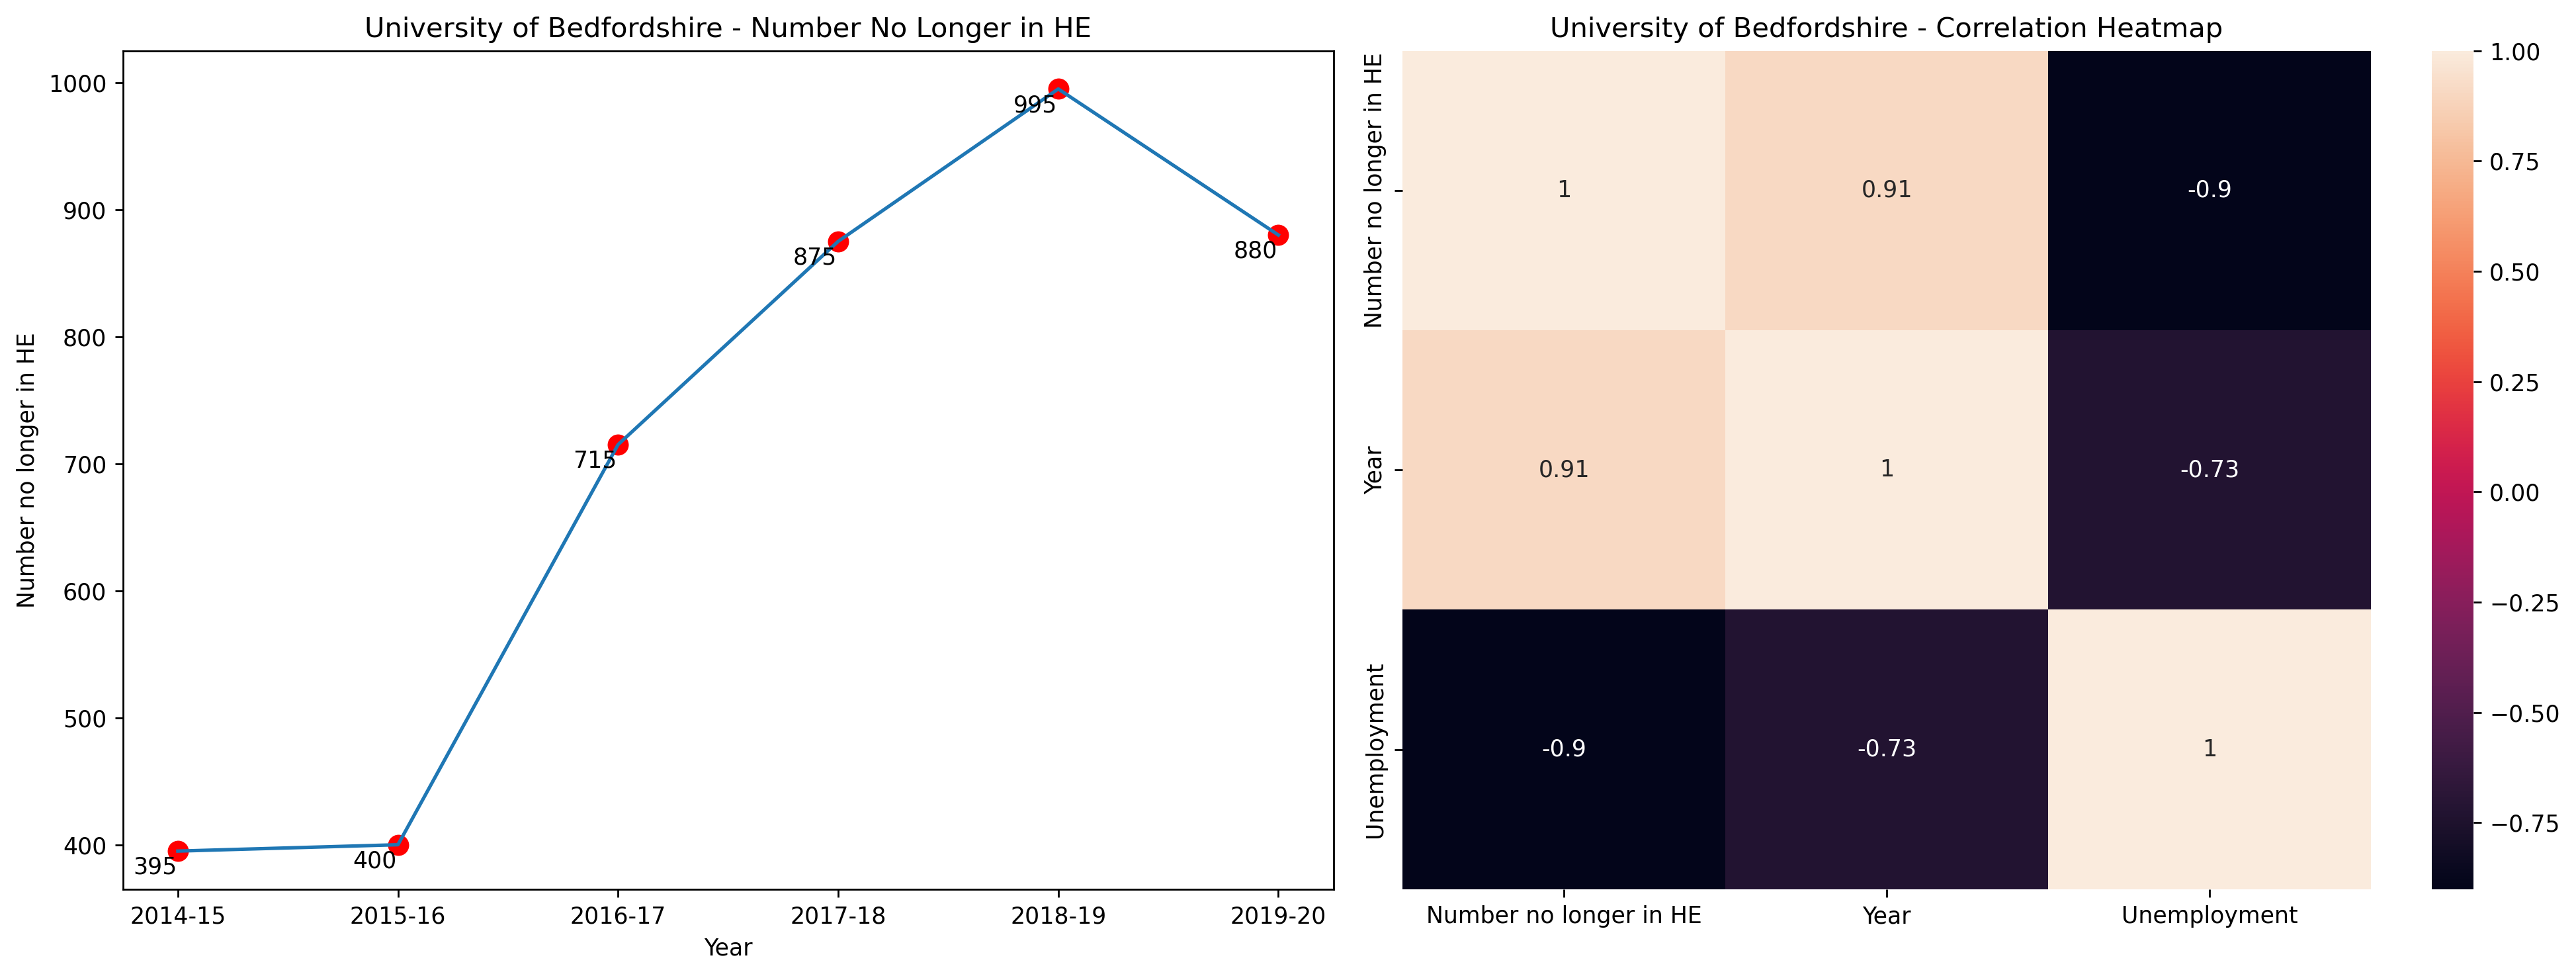

In [10]:
A = C[C['HE PROVIDER'] == 'University of Bedfordshire'][['Number no longer in HE','Year']] # For line plot
uni = C[C['HE PROVIDER'] == 'University of Bedfordshire'][['Number no longer in HE','Year']] 
year_uni = unemployment_data_yearly[-9:-3]
year_uni.set_index(uni.index,inplace=True)
uni_clean = pd.concat([uni,year_uni],axis=1)
# First subplot: Line plot and scatter plot
plt.figure(figsize=(16, 6), dpi=250)

plt.subplot(1, 2, 1)
sns.lineplot(x=A['Year'], y=A['Number no longer in HE'])
sns.scatterplot(x=A['Year'], y=A['Number no longer in HE'], color='red', s=100)
for x, y in zip(A['Year'], A['Number no longer in HE']):
    plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(-10, -10), ha='center')

plt.title('University of Bedfordshire - Number No Longer in HE')

# Second subplot: Heatmap
plt.subplot(1, 2, 2)
sns.heatmap(uni_clean.corr(),annot=True)

plt.title('University of Bedfordshire - Correlation Heatmap')

plt.tight_layout()
plt.show()


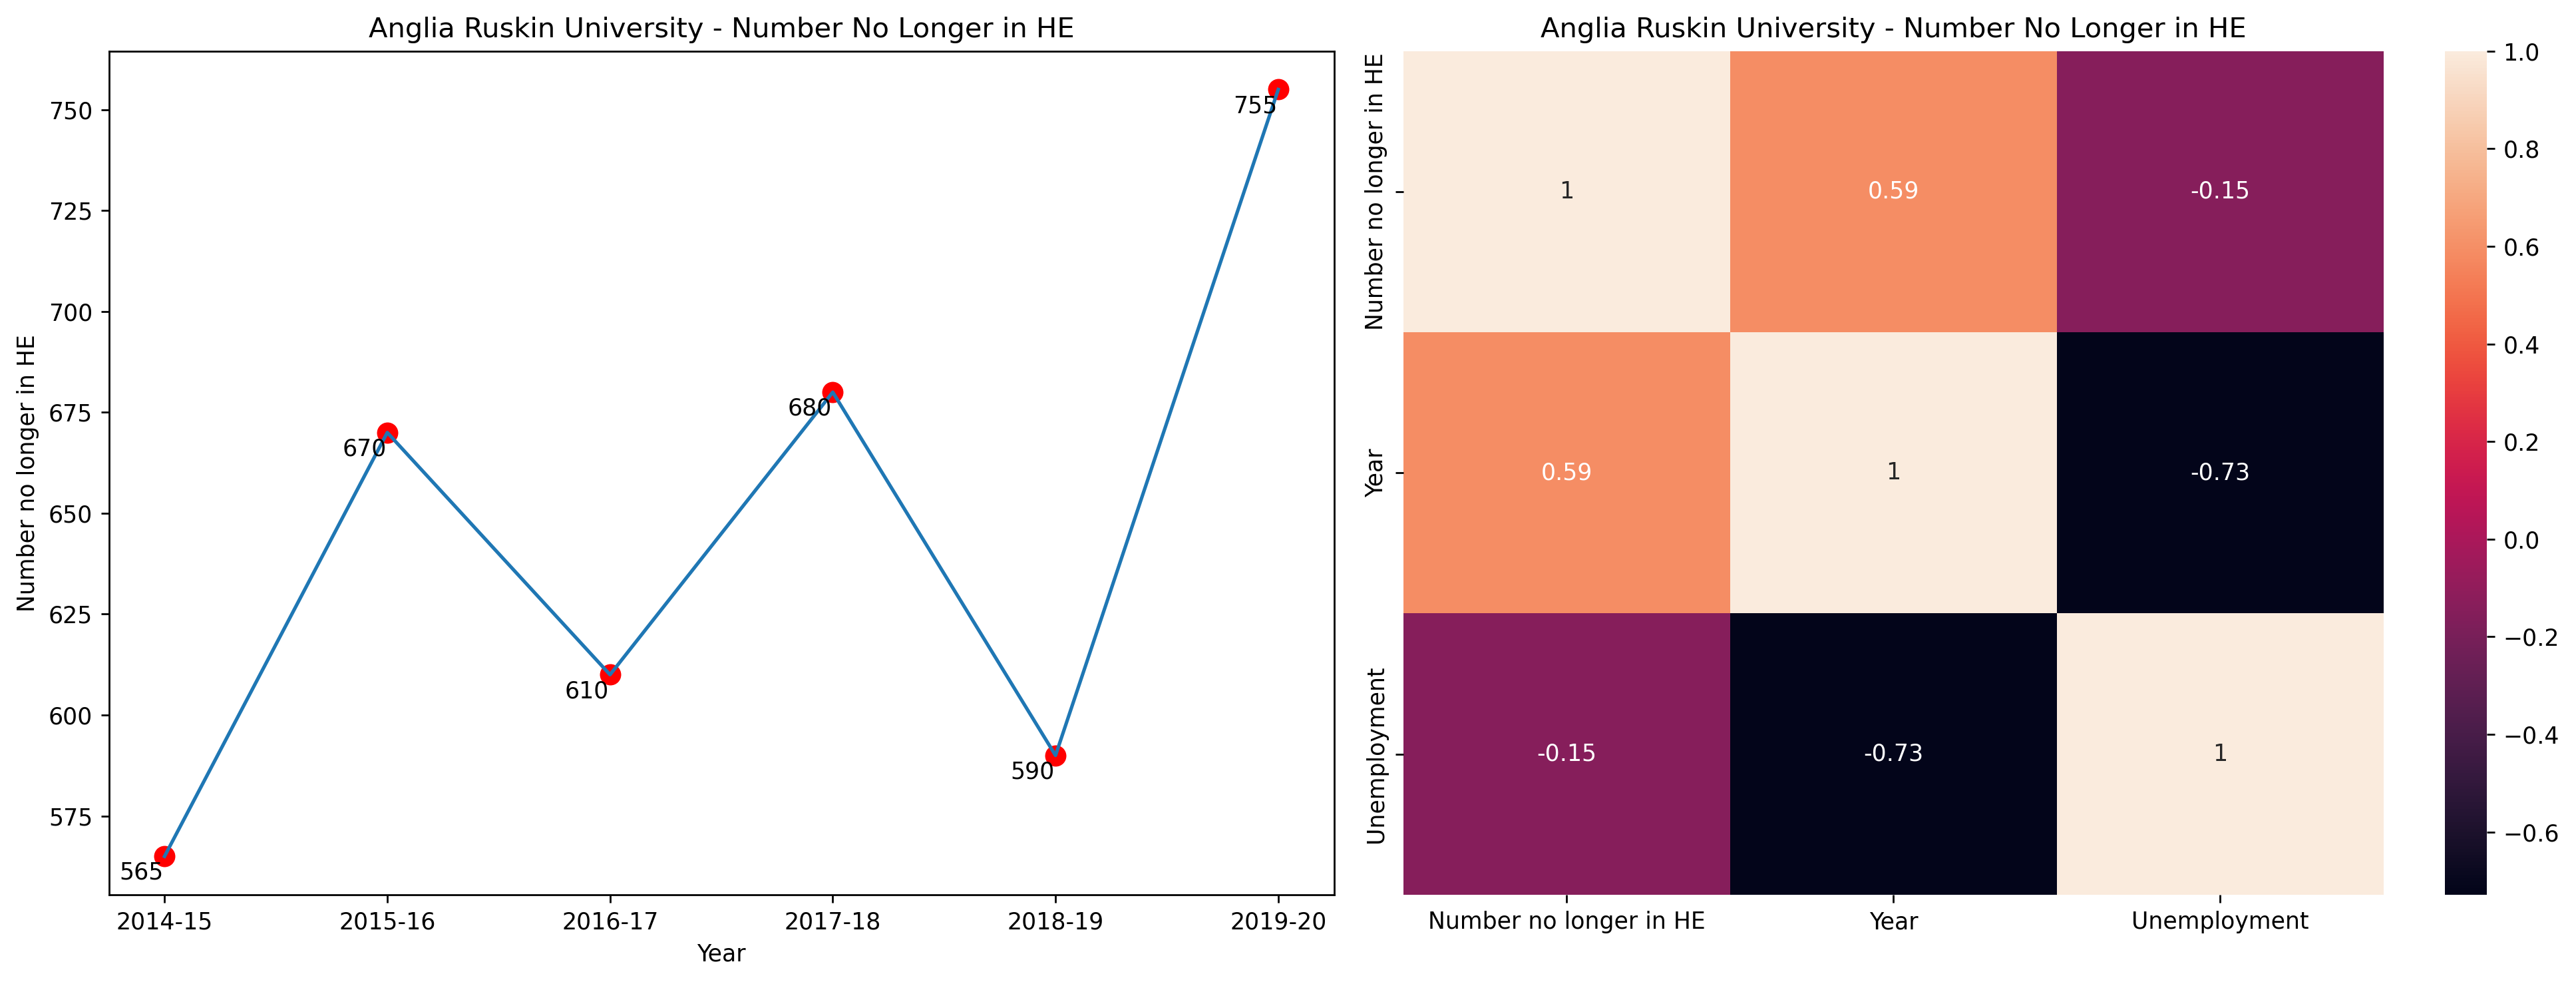

In [48]:
University_name = 'Anglia Ruskin University'

A = C[C['HE PROVIDER'] == University_name ][['Number no longer in HE','Year']] # For line plot

uni = C[C['HE PROVIDER'] == University_name ][['Number no longer in HE','Year']] 
year_uni = unemployment_data_yearly[-9:-3]
year_uni.set_index(uni.index,inplace=True)
uni_clean = pd.concat([uni,year_uni],axis=1)


# First subplot: Line plot and scatter plot
plt.figure(figsize=(16, 6), dpi=250)

plt.subplot(1, 2, 1)
sns.lineplot(x=A['Year'], y=A['Number no longer in HE'])
sns.scatterplot(x=A['Year'], y=A['Number no longer in HE'], color='red', s=100)
for x, y in zip(A['Year'], A['Number no longer in HE']):
    plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(-10, -10), ha='center')

plt.title(f'{University_name} - Number No Longer in HE')

# Second subplot: Heatmap
plt.subplot(1, 2, 2)
sns.heatmap(uni_clean.corr(),annot=True)

plt.title(f'{University_name} - Number No Longer in HE')

plt.tight_layout()
plt.show()


In [49]:
uni_clean.corr()

,Number no longer in HE,Year,Unemployment
Number no longer in HE,1.000000,0.594399,-0.147150
Year,0.594399,1.000000,-0.728477
Unemployment,-0.147150,-0.728477,1.000000


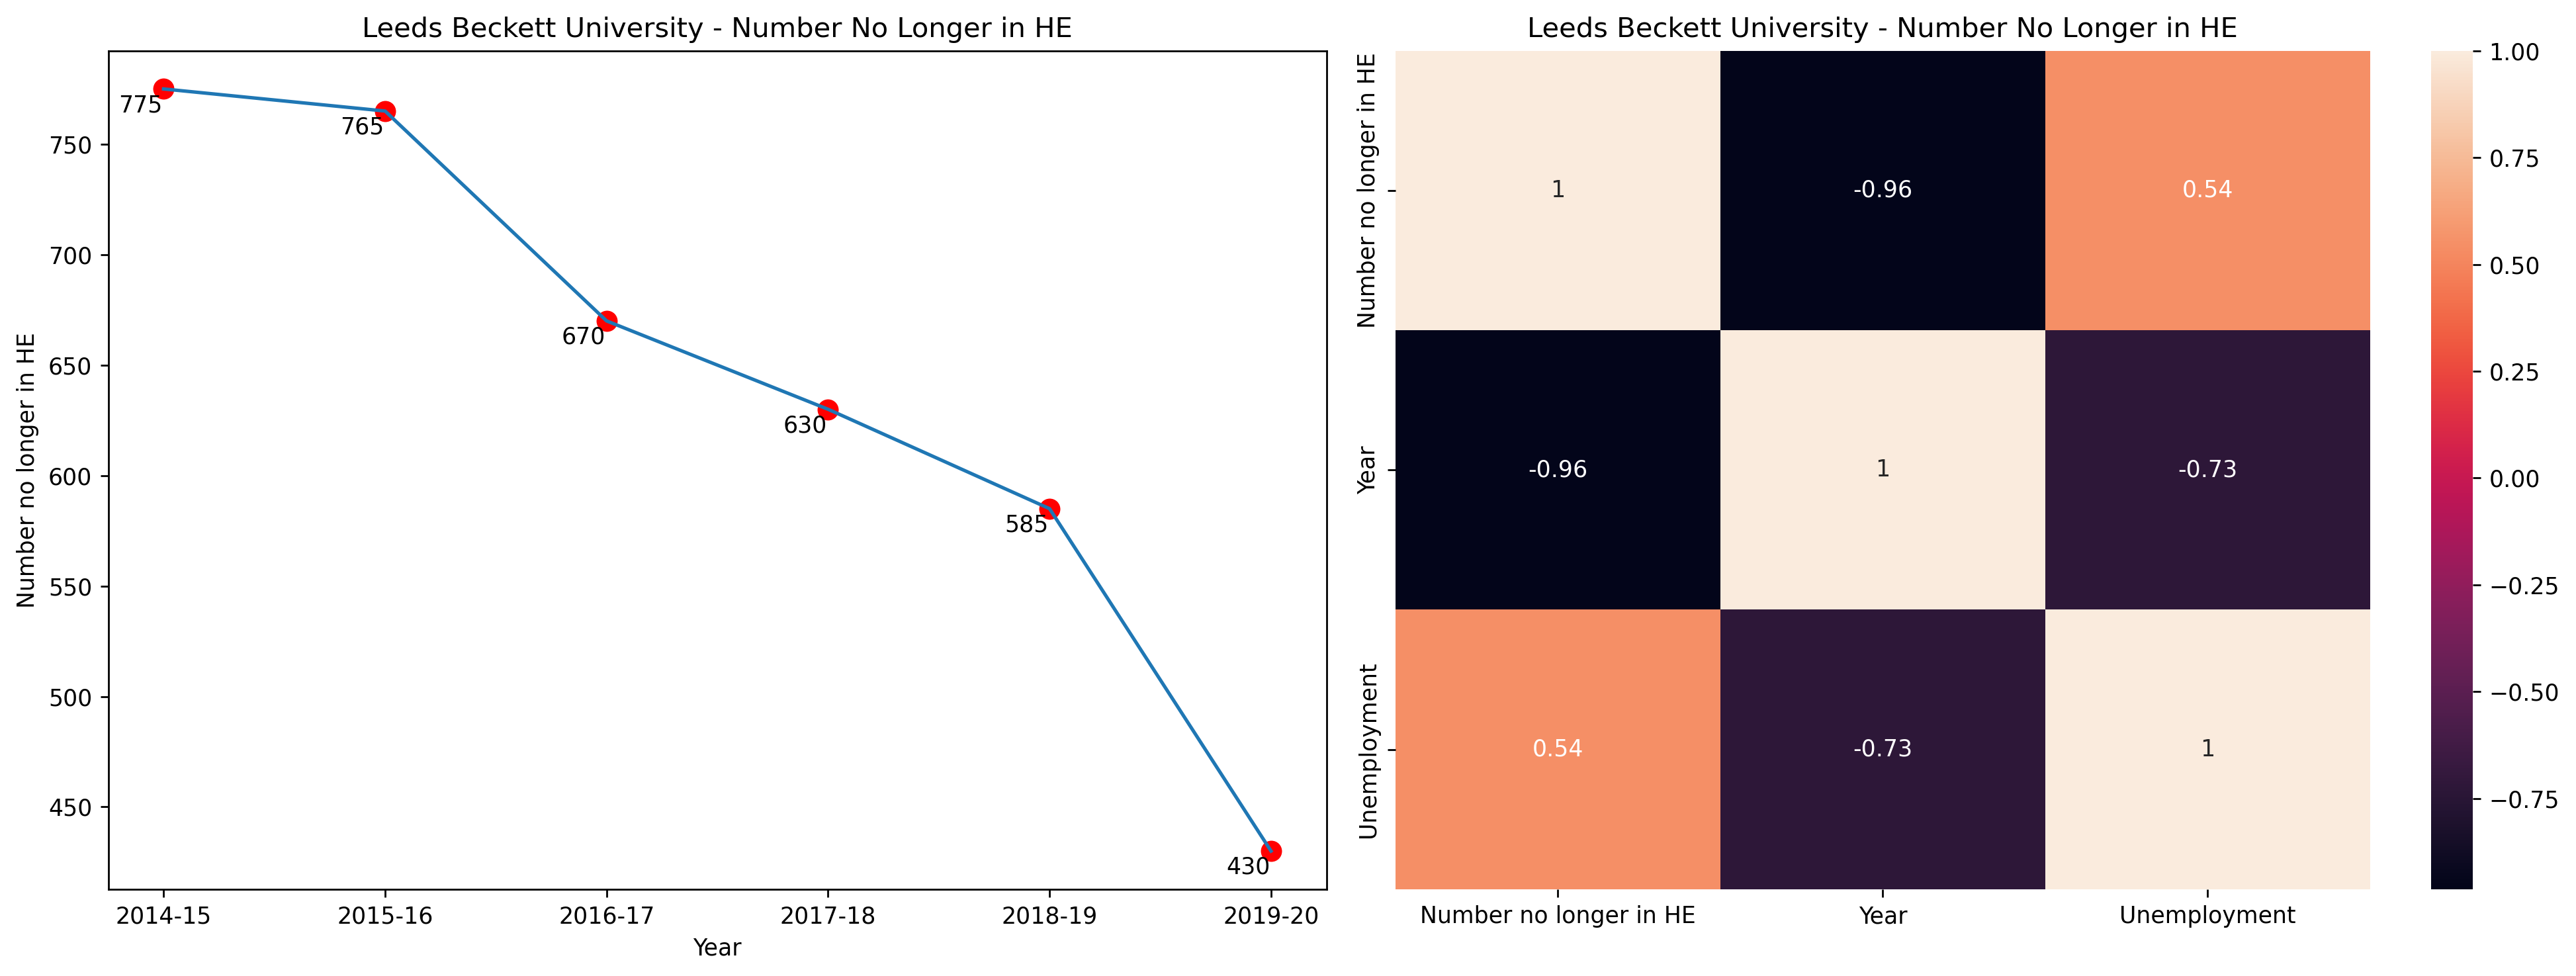

In [12]:
University_name = 'Leeds Beckett University'

A = C[C['HE PROVIDER'] == University_name ][['Number no longer in HE','Year']] # For line plot

uni = C[C['HE PROVIDER'] == University_name ][['Number no longer in HE','Year']] 
year_uni = unemployment_data_yearly[-9:-3]
year_uni.set_index(uni.index,inplace=True)
uni_clean = pd.concat([uni,year_uni],axis=1)


# First subplot: Line plot and scatter plot
plt.figure(figsize=(16, 6), dpi=250)

plt.subplot(1, 2, 1)
sns.lineplot(x=A['Year'], y=A['Number no longer in HE'])
sns.scatterplot(x=A['Year'], y=A['Number no longer in HE'], color='red', s=100)
for x, y in zip(A['Year'], A['Number no longer in HE']):
    plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(-10, -10), ha='center')

plt.title(f'{University_name} - Number No Longer in HE')

# Second subplot: Heatmap
plt.subplot(1, 2, 2)
sns.heatmap(uni_clean.corr(),annot=True)

plt.title(f'{University_name} - Number No Longer in HE')

plt.tight_layout()
plt.show()


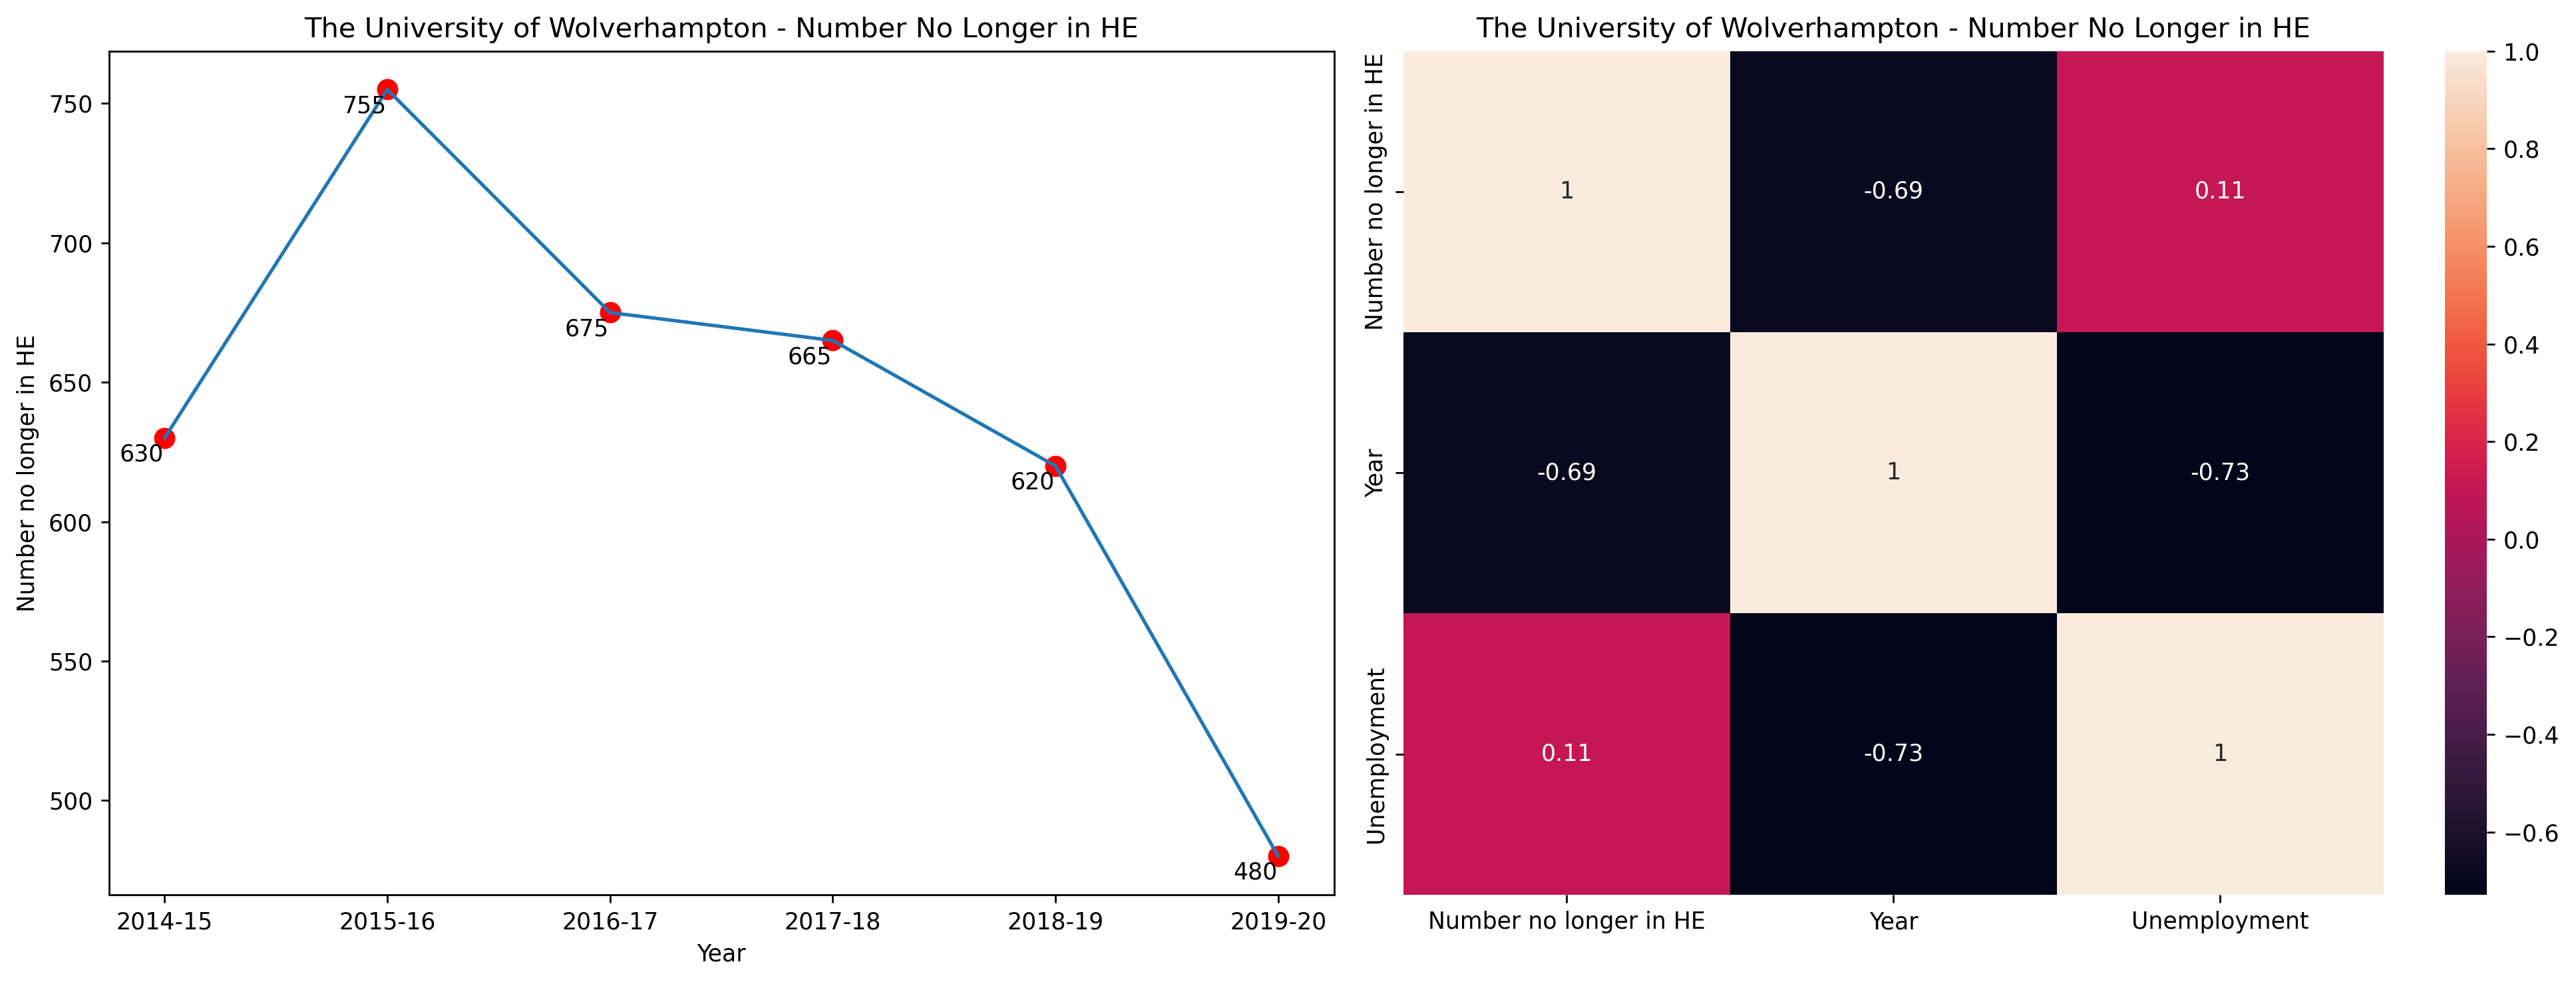

In [13]:
University_name = 'The University of Wolverhampton'

A = C[C['HE PROVIDER'] == University_name ][['Number no longer in HE','Year']] # For line plot

uni = C[C['HE PROVIDER'] == University_name ][['Number no longer in HE','Year']] 
year_uni = unemployment_data_yearly[-9:-3]
year_uni.set_index(uni.index,inplace=True)
uni_clean = pd.concat([uni,year_uni],axis=1)


# First subplot: Line plot and scatter plot
plt.figure(figsize=(16, 6), dpi=250)

plt.subplot(1, 2, 1)
sns.lineplot(x=A['Year'], y=A['Number no longer in HE'])
sns.scatterplot(x=A['Year'], y=A['Number no longer in HE'], color='red', s=100)
for x, y in zip(A['Year'], A['Number no longer in HE']):
    plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(-10, -10), ha='center')

plt.title(f'{University_name} - Number No Longer in HE')

# Second subplot: Heatmap
plt.subplot(1, 2, 2)
sns.heatmap(uni_clean.corr(),annot=True)

plt.title(f'{University_name} - Number No Longer in HE')

plt.tight_layout()
plt.show()


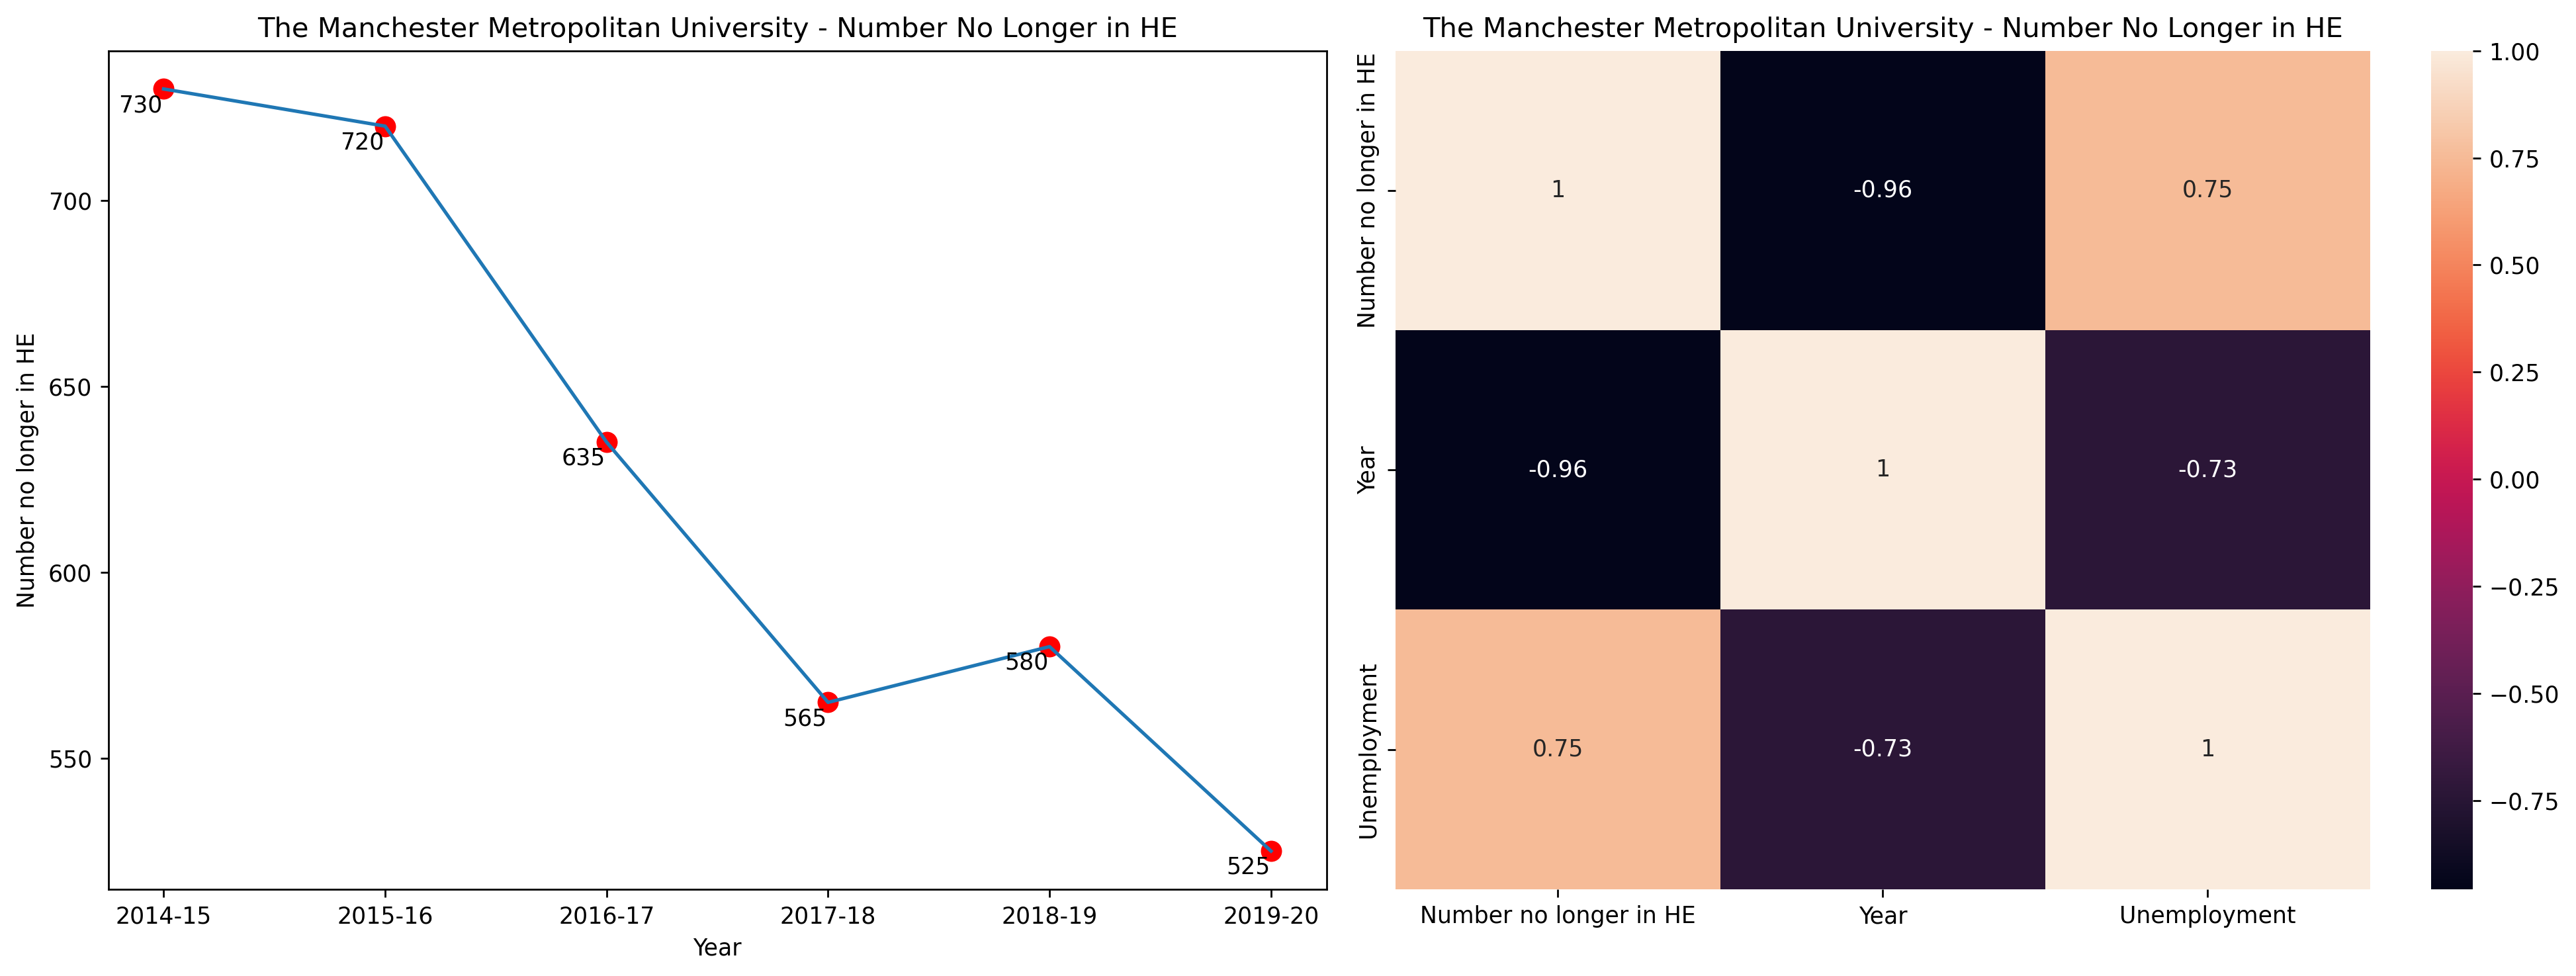

In [50]:
University_name = 'The Manchester Metropolitan University'

A = C[C['HE PROVIDER'] == University_name ][['Number no longer in HE','Year']] # For line plot

uni = C[C['HE PROVIDER'] == University_name ][['Number no longer in HE','Year']] 
year_uni = unemployment_data_yearly[-9:-3]
year_uni.set_index(uni.index,inplace=True)
uni_clean = pd.concat([uni,year_uni],axis=1)


# First subplot: Line plot and scatter plot
plt.figure(figsize=(16, 6), dpi=250)

plt.subplot(1, 2, 1)
sns.lineplot(x=A['Year'], y=A['Number no longer in HE'])
sns.scatterplot(x=A['Year'], y=A['Number no longer in HE'], color='red', s=100)
for x, y in zip(A['Year'], A['Number no longer in HE']):
    plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(-10, -10), ha='center')

plt.title(f'{University_name} - Number No Longer in HE')

# Second subplot: Heatmap
plt.subplot(1, 2, 2)
sns.heatmap(uni_clean.corr(),annot=True)

plt.title(f'{University_name} - Number No Longer in HE')

plt.tight_layout()
plt.show()


In [51]:
uni_clean.corr()

,Number no longer in HE,Year,Unemployment
Number no longer in HE,1.000000,-0.957412,0.753797
Year,-0.957412,1.000000,-0.728477
Unemployment,0.753797,-0.728477,1.000000


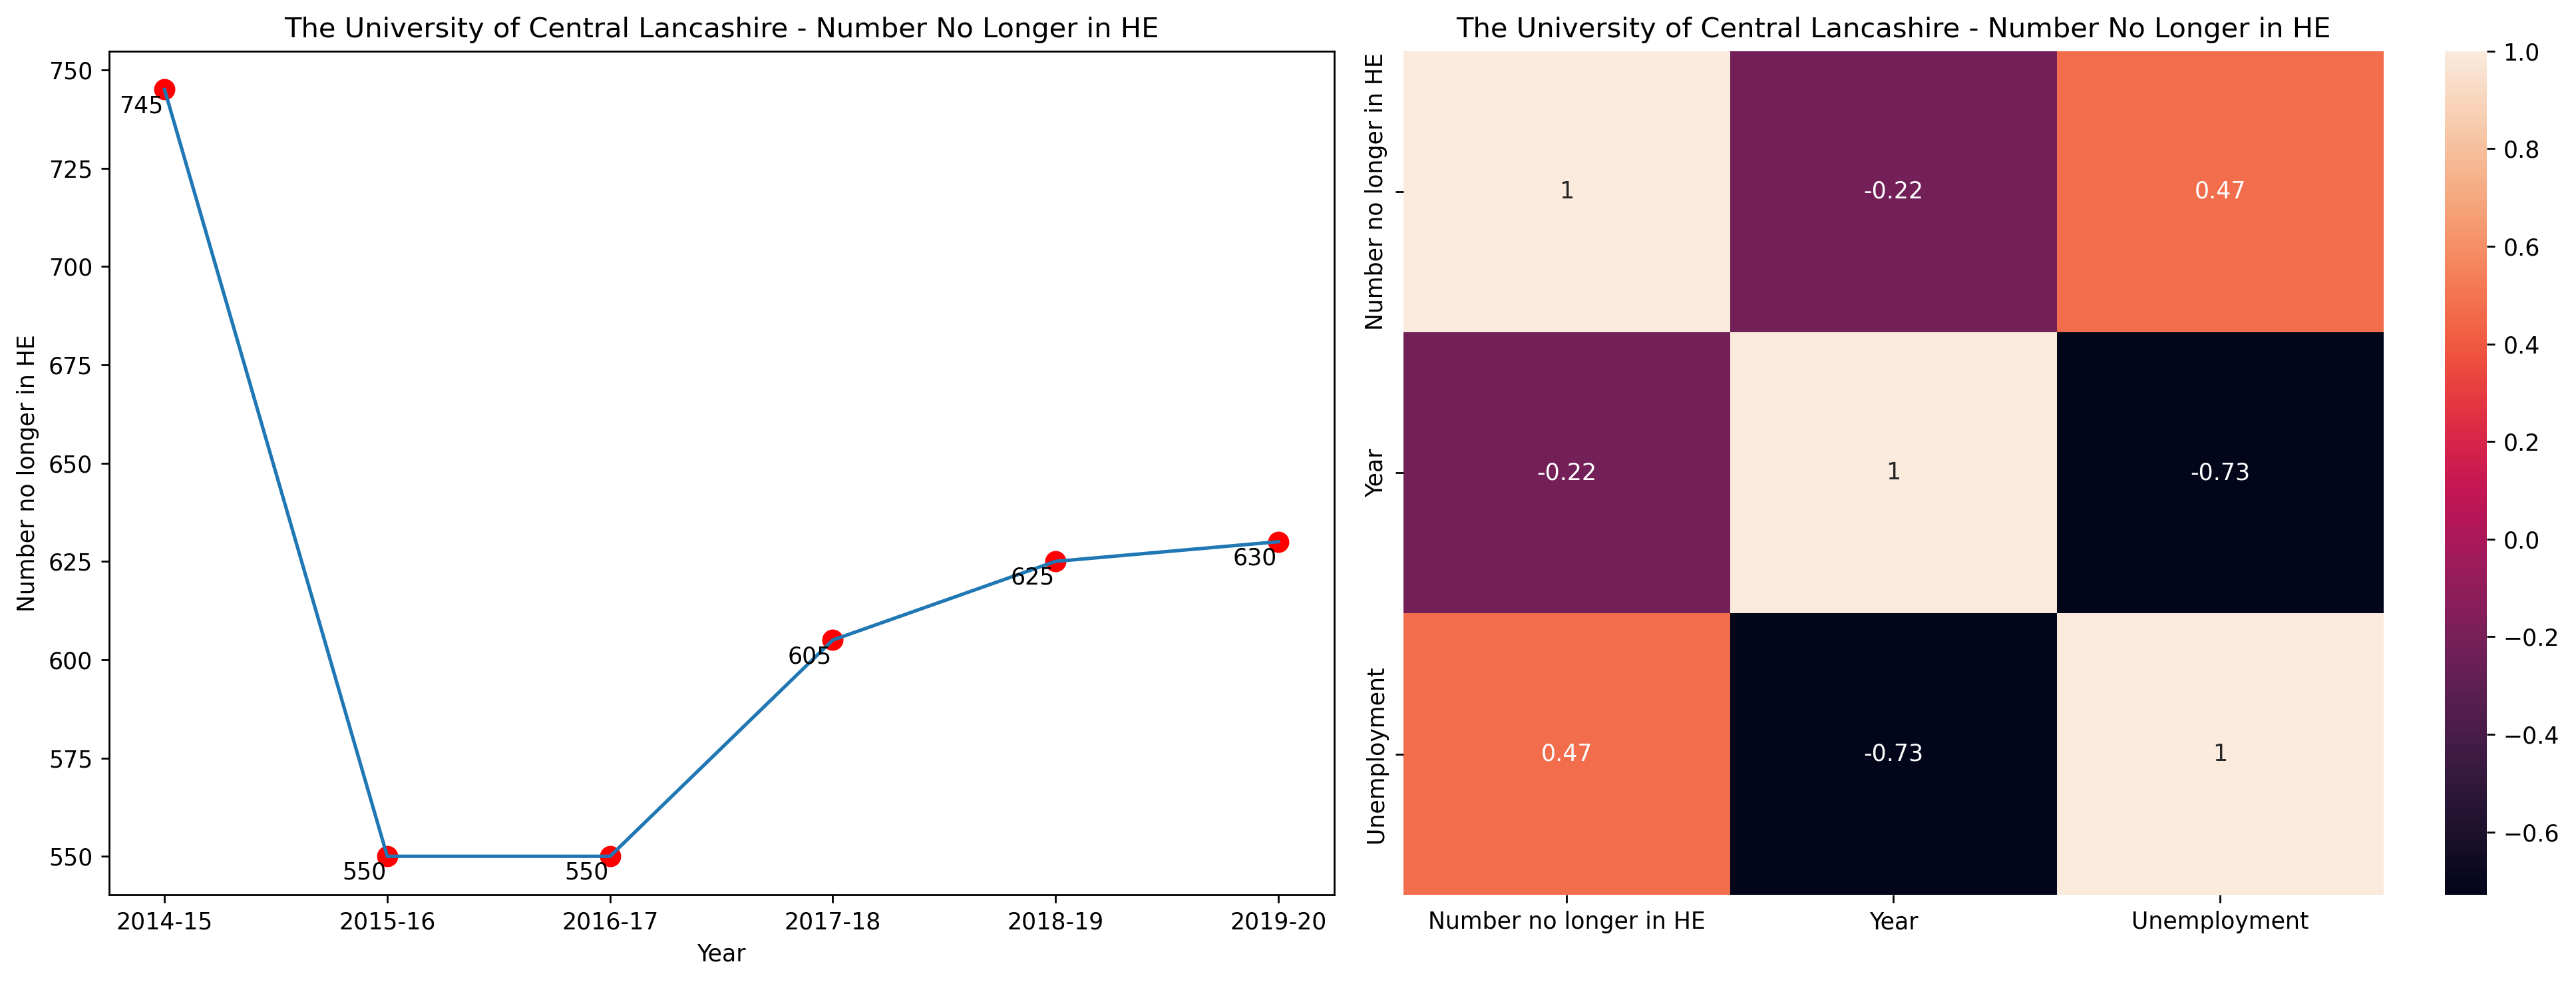

In [52]:
University_name = 'The University of Central Lancashire'

A = C[C['HE PROVIDER'] == University_name ][['Number no longer in HE','Year']] # For line plot

uni = C[C['HE PROVIDER'] == University_name ][['Number no longer in HE','Year']] 
year_uni = unemployment_data_yearly[-9:-3]
year_uni.set_index(uni.index,inplace=True)
uni_clean = pd.concat([uni,year_uni],axis=1)


# First subplot: Line plot and scatter plot
plt.figure(figsize=(16, 6), dpi=250)

plt.subplot(1, 2, 1)
sns.lineplot(x=A['Year'], y=A['Number no longer in HE'])
sns.scatterplot(x=A['Year'], y=A['Number no longer in HE'], color='red', s=100)
for x, y in zip(A['Year'], A['Number no longer in HE']):
    plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(-10, -10), ha='center')

plt.title(f'{University_name} - Number No Longer in HE')

# Second subplot: Heatmap
plt.subplot(1, 2, 2)
sns.heatmap(uni_clean.corr(),annot=True)

plt.title(f'{University_name} - Number No Longer in HE')

plt.tight_layout()
plt.show()


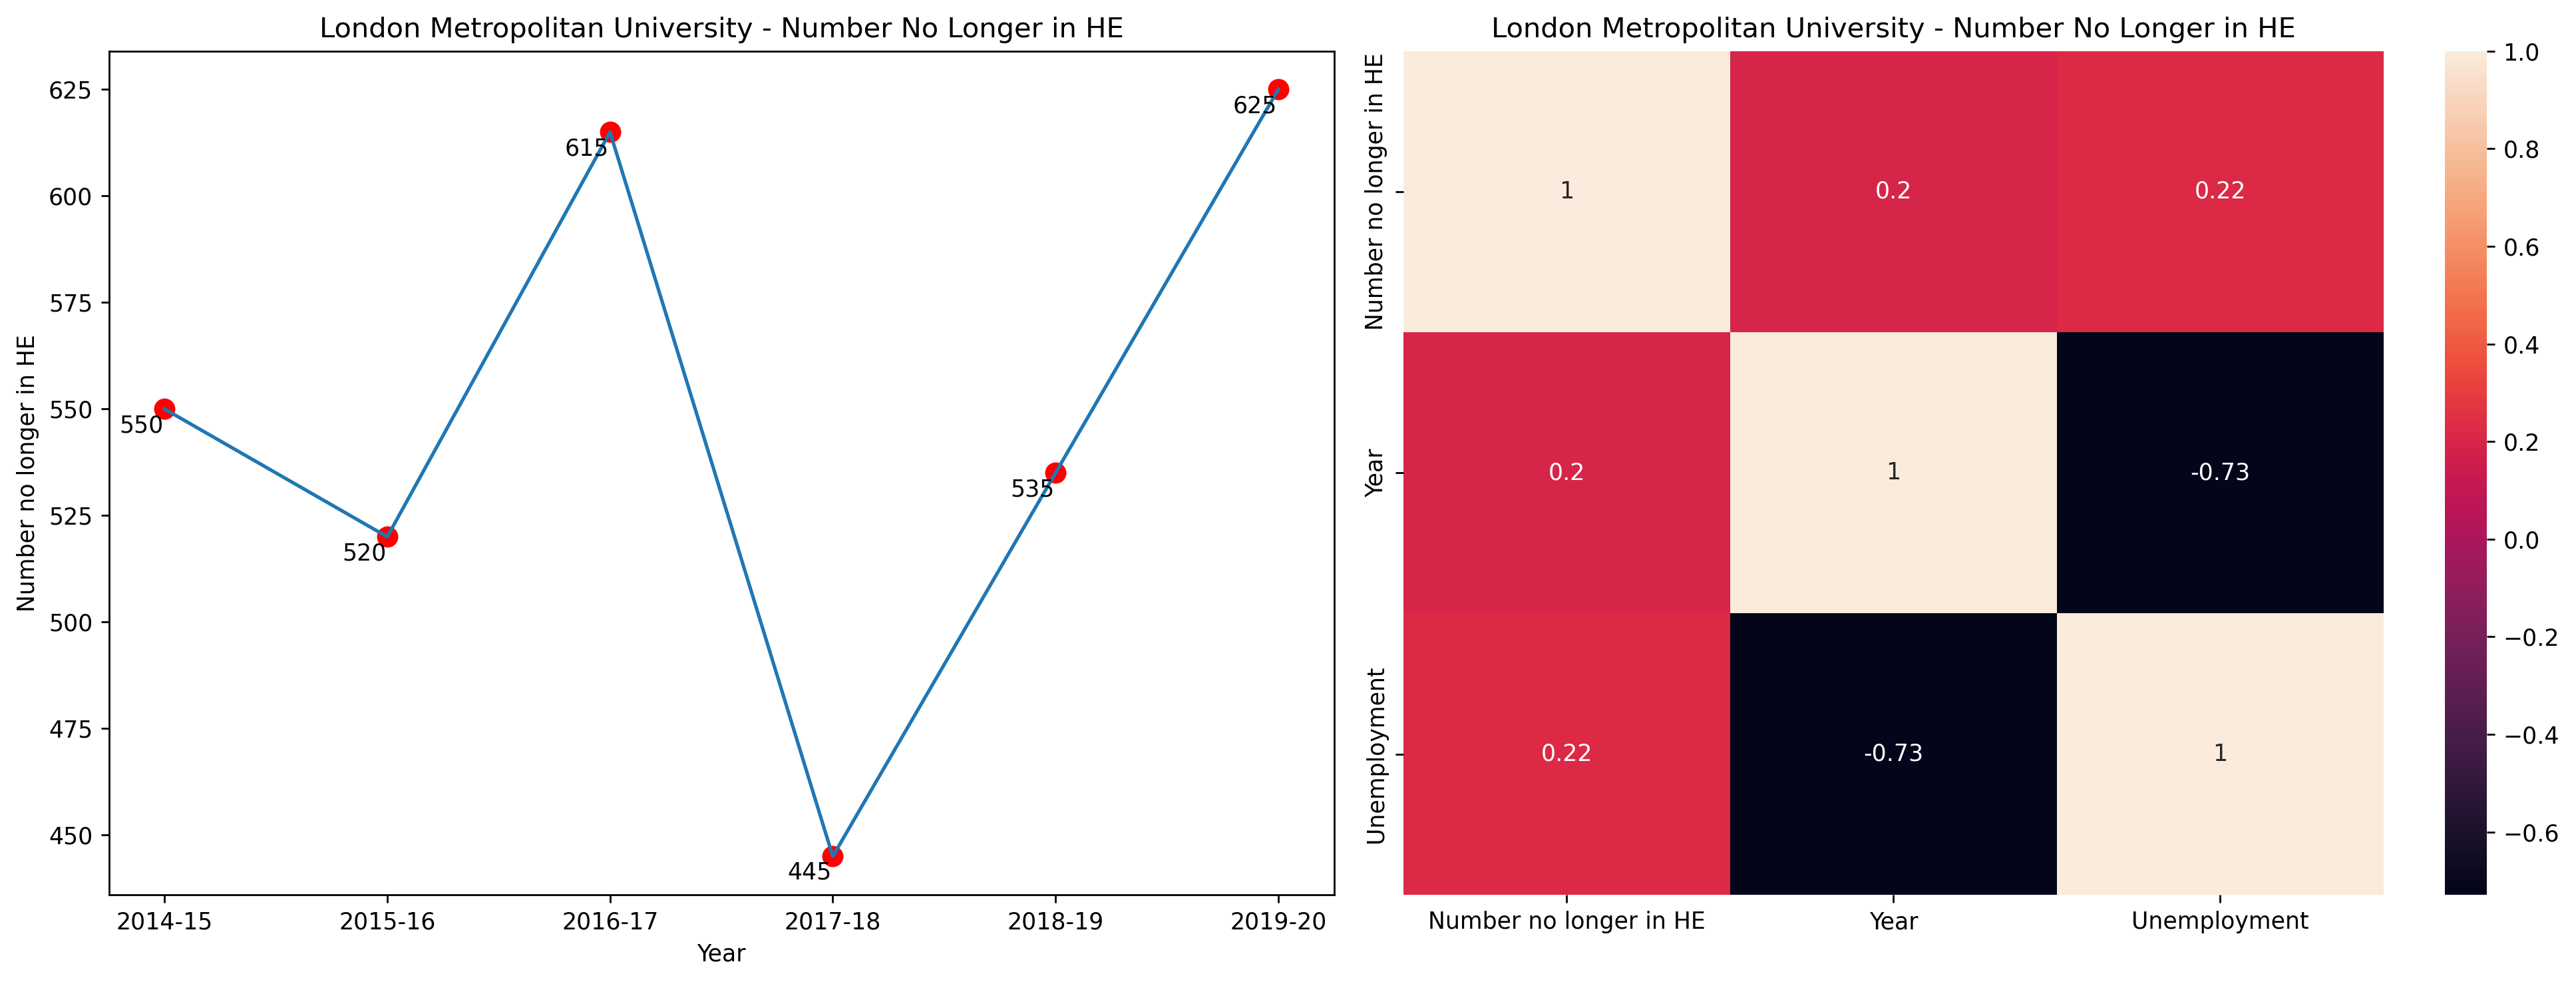

In [16]:
University_name = 'London Metropolitan University'

A = C[C['HE PROVIDER'] == University_name ][['Number no longer in HE','Year']] # For line plot

uni = C[C['HE PROVIDER'] == University_name ][['Number no longer in HE','Year']] 
year_uni = unemployment_data_yearly[-9:-3]
year_uni.set_index(uni.index,inplace=True)
uni_clean = pd.concat([uni,year_uni],axis=1)


# First subplot: Line plot and scatter plot
plt.figure(figsize=(16, 6), dpi=250)

plt.subplot(1, 2, 1)
sns.lineplot(x=A['Year'], y=A['Number no longer in HE'])
sns.scatterplot(x=A['Year'], y=A['Number no longer in HE'], color='red', s=100)
for x, y in zip(A['Year'], A['Number no longer in HE']):
    plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(-10, -10), ha='center')

plt.title(f'{University_name} - Number No Longer in HE')

# Second subplot: Heatmap
plt.subplot(1, 2, 2)
sns.heatmap(uni_clean.corr(),annot=True)

plt.title(f'{University_name} - Number No Longer in HE')

plt.tight_layout()
plt.show()


In [53]:
uni_clean.corr()

,Number no longer in HE,Year,Unemployment
Number no longer in HE,1.000000,-0.219781,0.467255
Year,-0.219781,1.000000,-0.728477
Unemployment,0.467255,-0.728477,1.000000


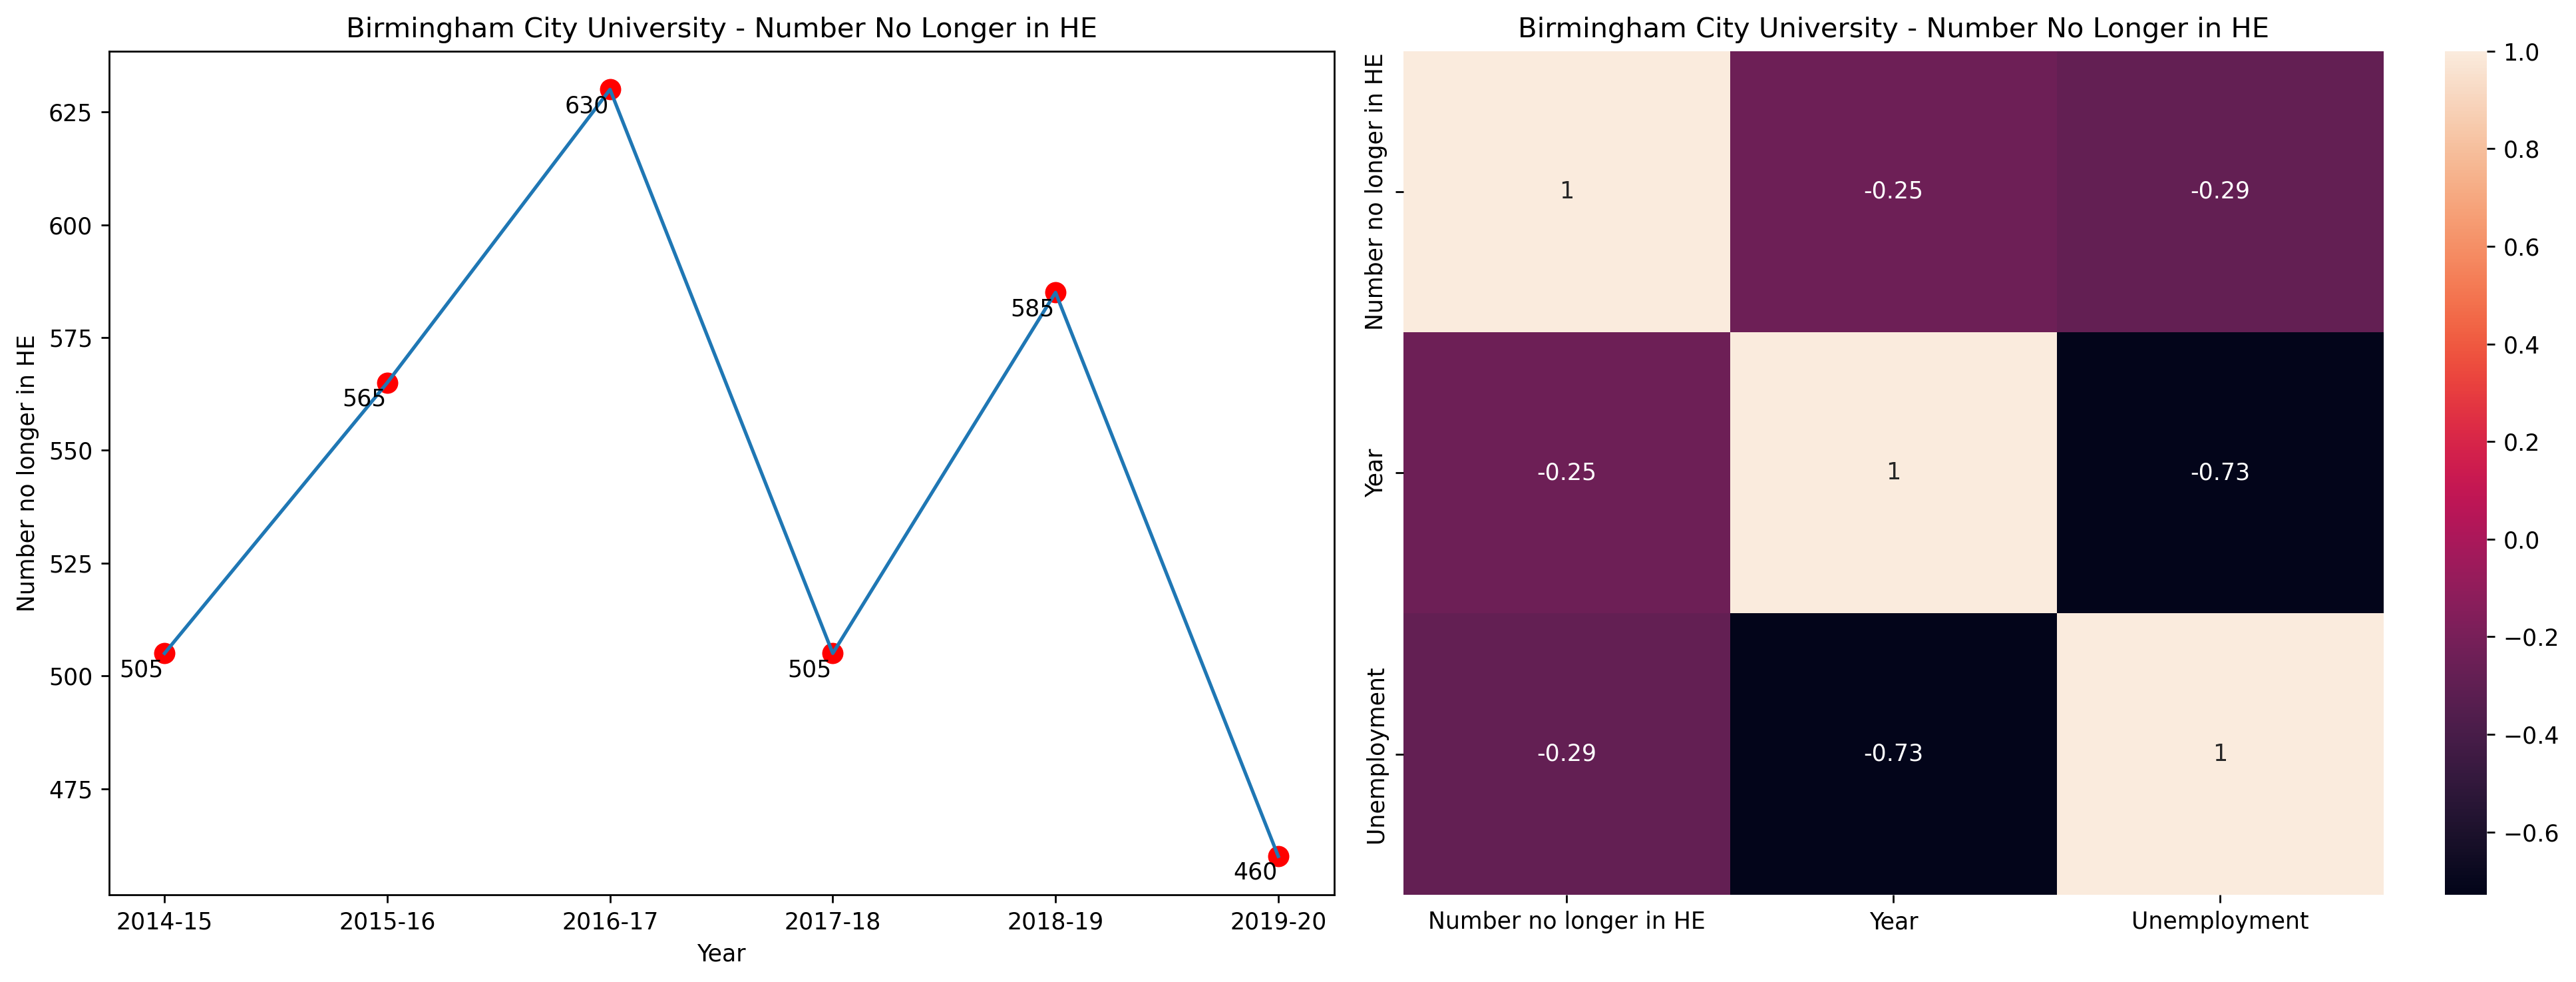

In [17]:
University_name = 'Birmingham City University'

A = C[C['HE PROVIDER'] == University_name ][['Number no longer in HE','Year']] # For line plot

uni = C[C['HE PROVIDER'] == University_name ][['Number no longer in HE','Year']] 
year_uni = unemployment_data_yearly[-9:-3]
year_uni.set_index(uni.index,inplace=True)
uni_clean = pd.concat([uni,year_uni],axis=1)


# First subplot: Line plot and scatter plot
plt.figure(figsize=(16, 6), dpi=250)

plt.subplot(1, 2, 1)
sns.lineplot(x=A['Year'], y=A['Number no longer in HE'])
sns.scatterplot(x=A['Year'], y=A['Number no longer in HE'], color='red', s=100)
for x, y in zip(A['Year'], A['Number no longer in HE']):
    plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(-10, -10), ha='center')

plt.title(f'{University_name} - Number No Longer in HE')

# Second subplot: Heatmap
plt.subplot(1, 2, 2)
sns.heatmap(uni_clean.corr(),annot=True)

plt.title(f'{University_name} - Number No Longer in HE')

plt.tight_layout()
plt.show()


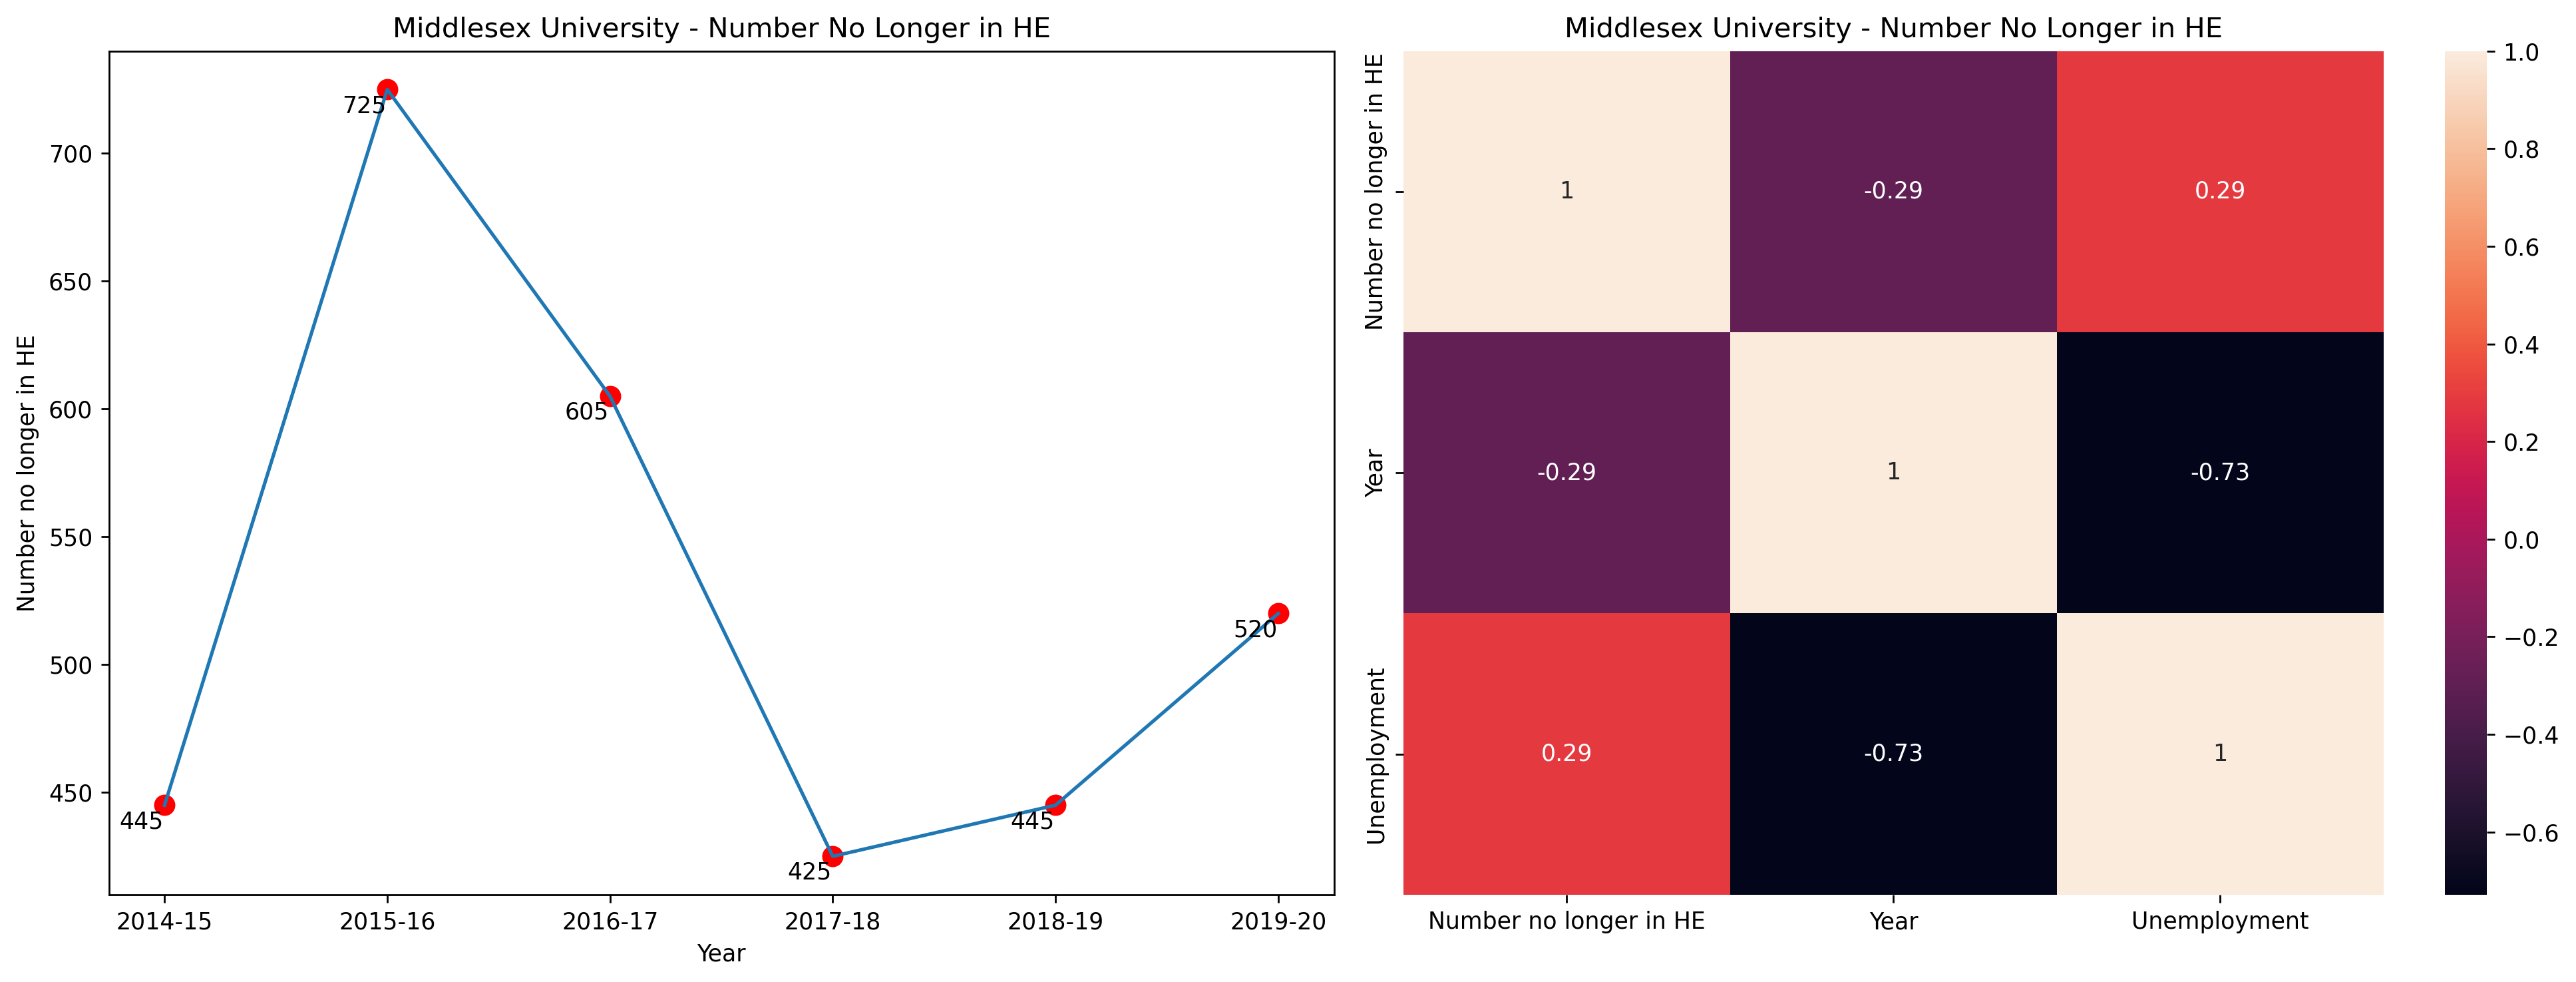

In [18]:
University_name = 'Middlesex University'

A = C[C['HE PROVIDER'] == University_name ][['Number no longer in HE','Year']] # For line plot

uni = C[C['HE PROVIDER'] == University_name ][['Number no longer in HE','Year']] 
year_uni = unemployment_data_yearly[-9:-3]
year_uni.set_index(uni.index,inplace=True)
uni_clean = pd.concat([uni,year_uni],axis=1)


# First subplot: Line plot and scatter plot
plt.figure(figsize=(16, 6), dpi=250)

plt.subplot(1, 2, 1)
sns.lineplot(x=A['Year'], y=A['Number no longer in HE'])
sns.scatterplot(x=A['Year'], y=A['Number no longer in HE'], color='red', s=100)
for x, y in zip(A['Year'], A['Number no longer in HE']):
    plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(-10, -10), ha='center')

plt.title(f'{University_name} - Number No Longer in HE')

# Second subplot: Heatmap
plt.subplot(1, 2, 2)
sns.heatmap(uni_clean.corr(),annot=True)

plt.title(f'{University_name} - Number No Longer in HE')

plt.tight_layout()
plt.show()


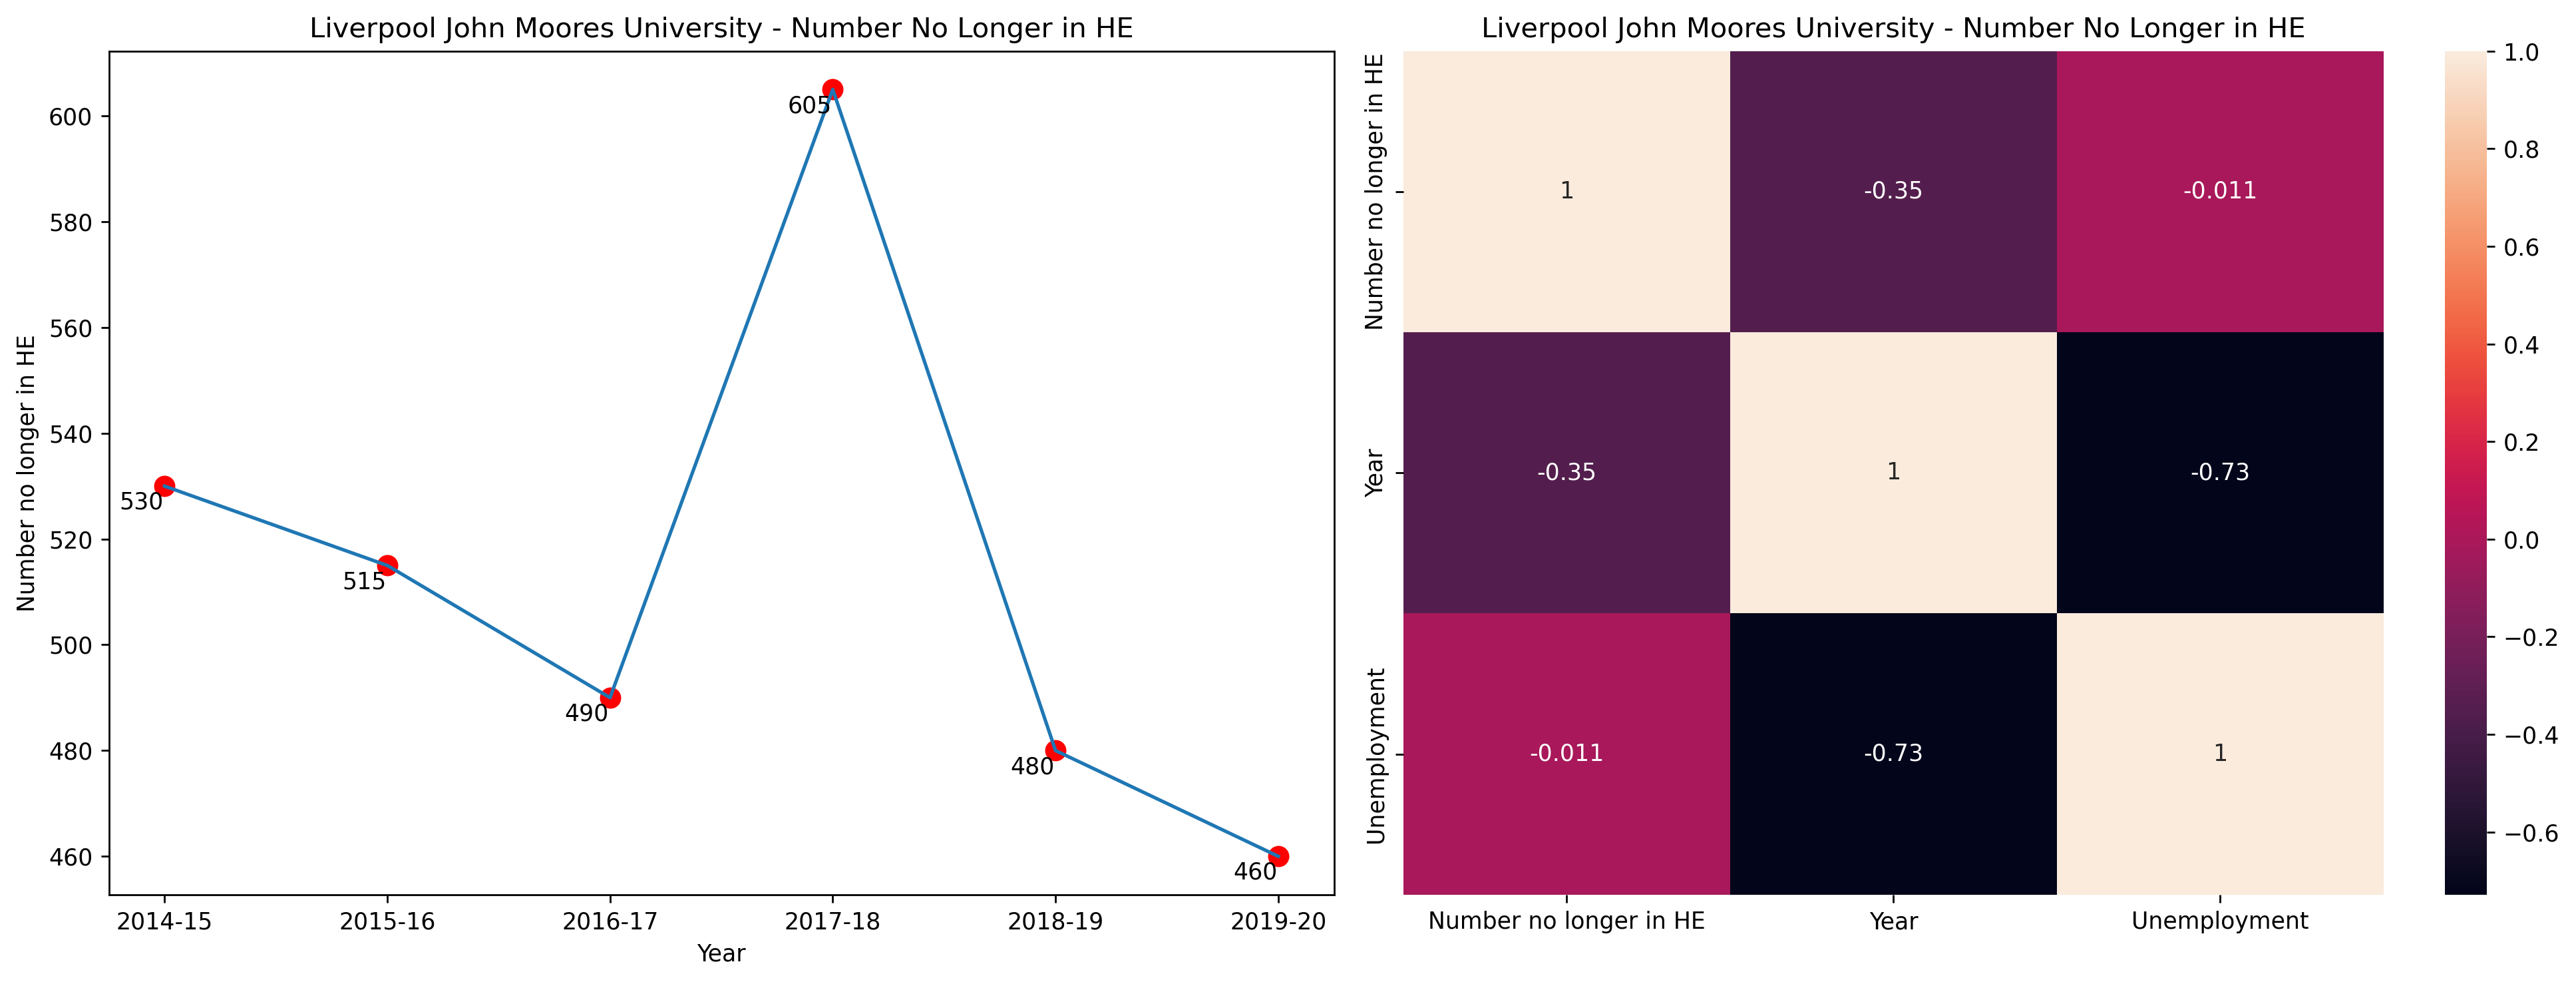

In [19]:
University_name = 'Liverpool John Moores University'

A = C[C['HE PROVIDER'] == University_name ][['Number no longer in HE','Year']] # For line plot

uni = C[C['HE PROVIDER'] == University_name ][['Number no longer in HE','Year']] 
year_uni = unemployment_data_yearly[-9:-3]
year_uni.set_index(uni.index,inplace=True)
uni_clean = pd.concat([uni,year_uni],axis=1)


# First subplot: Line plot and scatter plot
plt.figure(figsize=(16, 6), dpi=250)

plt.subplot(1, 2, 1)
sns.lineplot(x=A['Year'], y=A['Number no longer in HE'])
sns.scatterplot(x=A['Year'], y=A['Number no longer in HE'], color='red', s=100)
for x, y in zip(A['Year'], A['Number no longer in HE']):
    plt.annotate(f'{y}', (x, y), textcoords="offset points", xytext=(-10, -10), ha='center')

plt.title(f'{University_name} - Number No Longer in HE')

# Second subplot: Heatmap
plt.subplot(1, 2, 2)
sns.heatmap(uni_clean.corr(),annot=True)

plt.title(f'{University_name} - Number No Longer in HE')

plt.tight_layout()
plt.show()


# All plots in one figure

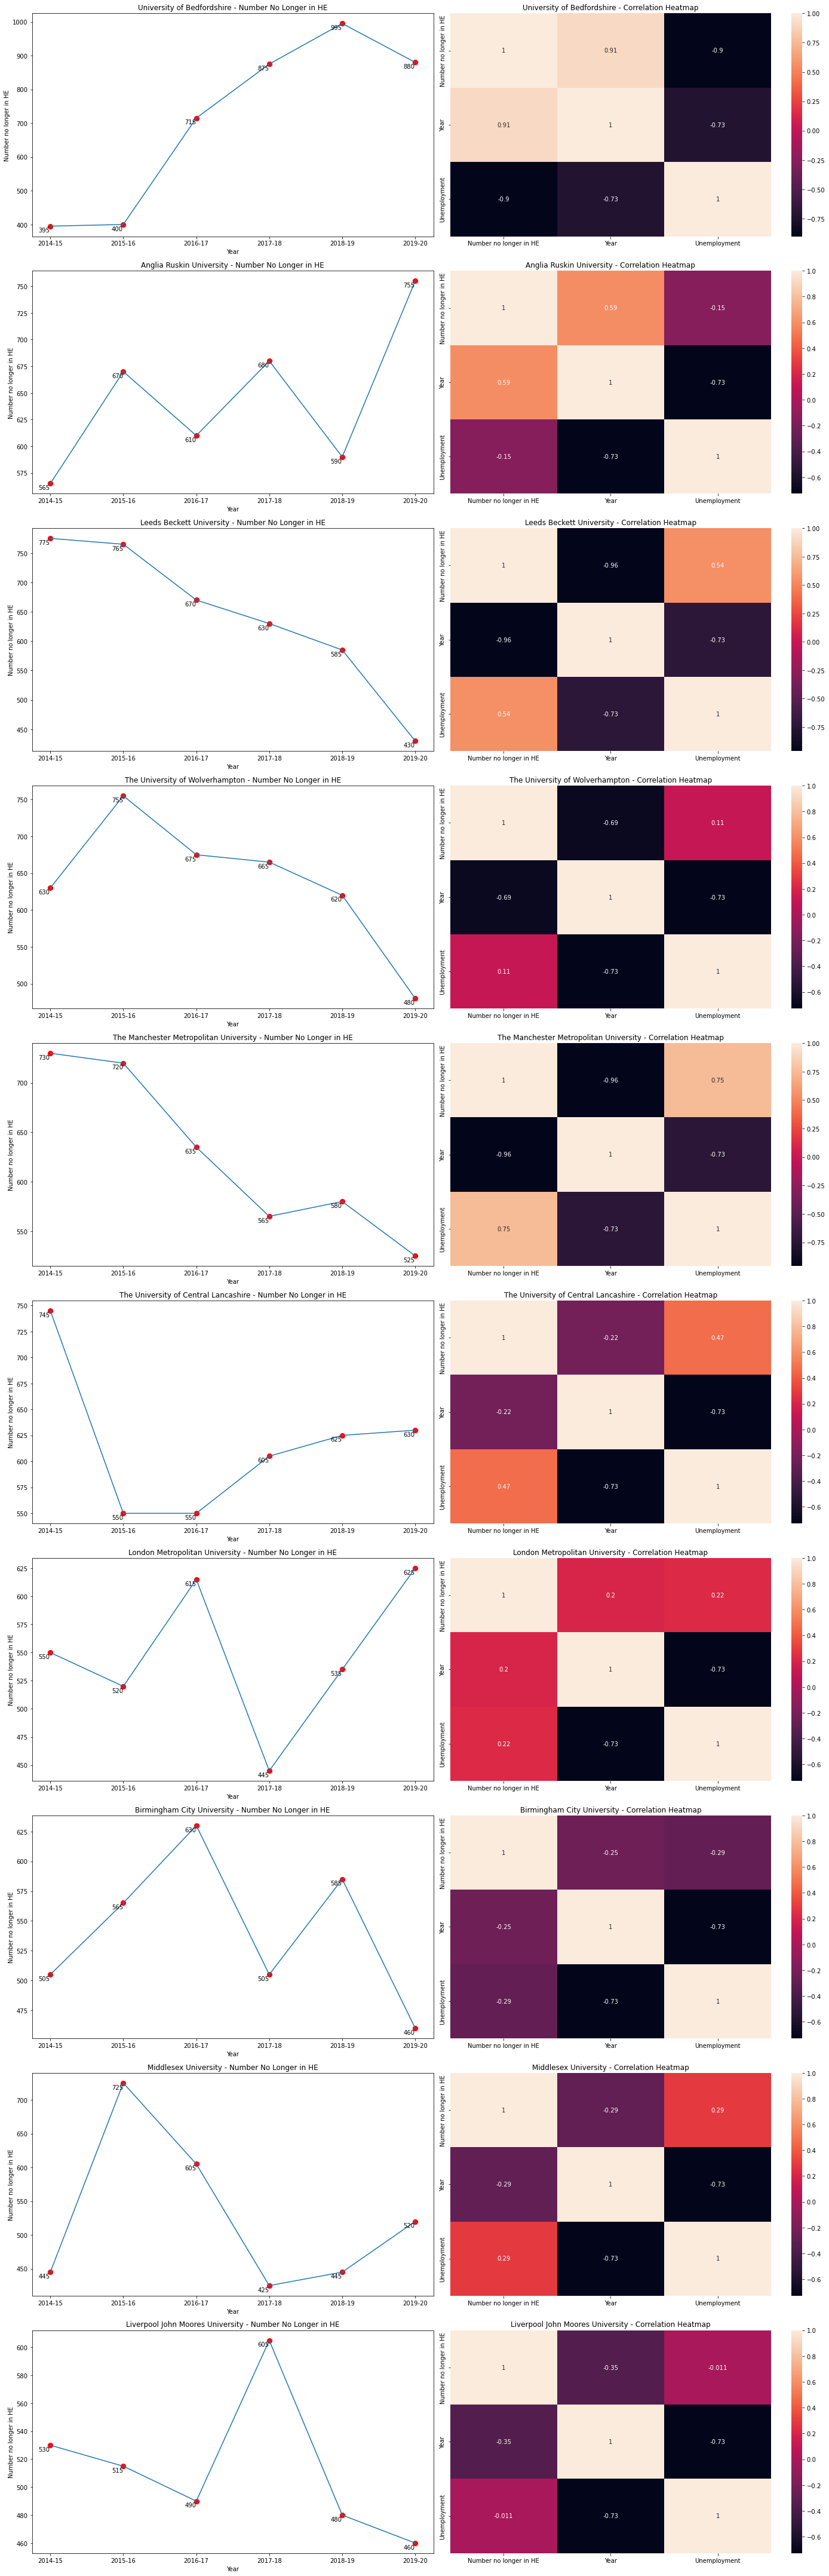

In [21]:
# Define the list of top 10 universities
top_10_universities = [
    "University of Bedfordshire",
    "Anglia Ruskin University",
    "Leeds Beckett University",
    "The University of Wolverhampton",
    "The Manchester Metropolitan University",
    "The University of Central Lancashire",
    "London Metropolitan University",
    "Birmingham City University",
    "Middlesex University",
    "Liverpool John Moores University"
]

fig, axs = plt.subplots(10, 2, figsize=(20, 60))

# For each of the top 10 universities
for i, university in enumerate(top_10_universities):
    A = df[df['HE PROVIDER'] == university][['Number no longer in HE','Year']] 
    uni = df[df['HE PROVIDER'] == university][['Number no longer in HE','Year']] 
    year_uni = unemployment_data_yearly[-9:-3]
    year_uni.set_index(uni.index, inplace=True)
    uni_clean = pd.concat([uni, year_uni], axis=1)

    # First subplot: Line plot and scatter plot
    axs[i, 0].set_title(f'{university} - Number No Longer in HE')
    sns.lineplot(x=A['Year'], y=A['Number no longer in HE'], ax=axs[i, 0])
    sns.scatterplot(x=A['Year'], y=A['Number no longer in HE'], color='red', s=100, ax=axs[i, 0])
    for x, y in zip(A['Year'], A['Number no longer in HE']):
        axs[i, 0].annotate(f'{y}', (x, y), textcoords="offset points", xytext=(-10, -10), ha='center')

    # Second subplot: Heatmap
    axs[i, 1].set_title(f'{university} - Correlation Heatmap')
    sns.heatmap(uni_clean.corr(), annot=True, ax=axs[i, 1])

plt.tight_layout()
plt.show()


In [23]:
import pandas as pd

# Load the necessary dataframes
df = pd.read_csv('A England.csv')
df_unemployment_yearly =  unemployment_data_yearly

# Prepare a list to store correlation data
correlation_data = []

# For each university, calculate the correlation and store it
for university in top_10_universities:
    uni = df[df['HE PROVIDER'] == university][['Number no longer in HE']]
    year_uni = unemployment_data_yearly[-9:-3]
    year_uni.set_index(uni.index, inplace=True)
    uni_clean = pd.concat([uni, year_uni], axis=1)
    corr = uni_clean['Number no longer in HE'].corr(uni_clean['Unemployment'])
    correlation_data.append([university, corr])

# Convert the list to a dataframe
correlation_df_unemployment = pd.DataFrame(correlation_data, columns=['University', 'Unemployment rate with no longer in HE Correlation'])

correlation_df_unemployment


,University,Unemployment rate with no longer in HE Correlation
0,University of Bedfordshire,-0.900903
1,Anglia Ruskin University,-0.147150
2,Leeds Beckett University,0.540947
3,The University of Wolverhampton,0.105895
4,The Manchester Metropolitan University,0.753797
5,The University of Central Lancashire,0.467255
6,London Metropolitan University,0.216919
7,Birmingham City University,-0.287719
8,Middlesex University,0.287672
9,Liverpool John Moores University,-0.010939


# Insights and result Interpretation

Here's what each value means:

University of Bedfordshire: The correlation coefficient of -0.900903 indicates a strong negative correlation. This suggests that as the unemployment rate decreases, the number of students no longer in higher education increases, or vice versa.

Anglia Ruskin University: The correlation coefficient of -0.147150 indicates a very weak negative correlation. It suggests a minor tendency that the number of students no longer in higher education slightly increases as the unemployment rate decreases, or vice versa. However, the relationship is very weak and possibly negligible.

Leeds Beckett University: The correlation coefficient of 0.540947 indicates a moderate positive correlation. This suggests that as the unemployment rate increases, the number of students no longer in higher education also tends to increase.

The University of Wolverhampton: The correlation coefficient of 0.105895 indicates a very weak positive correlation. It suggests a minor tendency that the number of students no longer in higher education slightly increases as the unemployment rate increases. However, the relationship is very weak and possibly negligible.

The Manchester Metropolitan University: The correlation coefficient of 0.753797 indicates a strong positive correlation. This suggests that as the unemployment rate increases, the number of students no longer in higher education also tends to increase.

The University of Central Lancashire: The correlation coefficient of 0.467255 indicates a moderate positive correlation. This suggests that as the unemployment rate increases, the number of students no longer in higher education also tends to increase.

London Metropolitan University: The correlation coefficient of 0.216919 indicates a weak positive correlation. This suggests a slight tendency that the number of students no longer in higher education increases as the unemployment rate increases.

Birmingham City University: The correlation coefficient of -0.287719 indicates a weak negative correlation. This suggests a slight tendency that the number of students no longer in higher education increases as the unemployment rate decreases, or vice versa.

Middlesex University: The correlation coefficient of 0.287672 indicates a weak positive correlation. This suggests a slight tendency that the number of students no longer in higher education increases as the unemployment rate increases.

Liverpool John Moores University: The correlation coefficient of -0.010939 indicates virtually no correlation. This suggests that the unemployment rate and the number of students no longer in higher education are not significantly related.

# Conclusion

Overall, the correlation between the unemployment rate and the number of non-continuation students varies significantly across the universities.

In some universities, such as the University of Bedfordshire, the Manchester Metropolitan University, and Leeds Beckett University, there is a relatively strong correlation, either positive or negative. This suggests that the unemployment rate could have a substantial impact on the number of students who do not continue their studies. It's important to note that correlation does not imply causation, so while there is a relationship, it does not necessarily mean the unemployment rate is the cause of the change in non-continuation students.

On the other hand, in some universities, such as Anglia Ruskin University, The University of Wolverhampton, and Liverpool John Moores University, there is a weak correlation. This suggests that other factors might be more influential in determining the number of non-continuation students in these universities.

In conclusion, while the unemployment rate may impact the number of non-continuation students in some universities, it's not a universally applicable factor. The relationship between unemployment rates and non-continuation rates in universities is complex and likely influenced by a variety of factors, including university policies, student support services, and individual student circumstances.

Therefore, when formulating policies to reduce the non-continuation rates, universities should take into account the particular context and conditions of their institutions, and not rely solely on general economic indicators like the unemployment rate. A more comprehensive approach that considers various factors would be more effective in addressing the issue of non-continuation.

# Data cleanning For Food and non-alcoholic beverages data

In [39]:
df = pd.read_excel('food.xlsx')

In [40]:
df

,Date,Food and non-alcoholic beverages
0,2012-10-01,3.4
1,2012-11-01,3.9
2,2012-12-01,3.8
3,2013-01-01,4.2
4,2013-02-01,3.7
...,...,...
124,2023-02-01,18.2
125,2023-03-01,19.2
126,2023-04-01,19.1
127,2023-05-01,18.4


In [41]:
# Import necessary libraries
import pandas as pd

# Load the data
df_food = pd.read_excel("food.xlsx")  

# Convert the 'Date ' column to datetime
df_food['Date '] = pd.to_datetime(df_food['Date '])

# Extract the year from the 'Date ' column and store it in a new column 'Year'
df_food['Year'] = df_food['Date '].dt.year

# Group by the 'Year' column, and calculate the mean for each year
df_food_yearly_avg = df_food.groupby('Year').mean()

# Reset the index
df_food_yearly_avg.reset_index(inplace=True)

# Print the yearly averages
print(df_food_yearly_avg)


    Year  Food and non-alcoholic beverages
0   2012                          3.700000
1   2013                          3.766667
2   2014                         -0.183333
3   2015                         -2.583333
4   2016                         -2.383333
5   2017                          2.283333
6   2018                          2.091667
7   2019                          1.383333
8   2020                          0.700000
9   2021                          0.283333
10  2022                         10.900000
11  2023                         18.183333


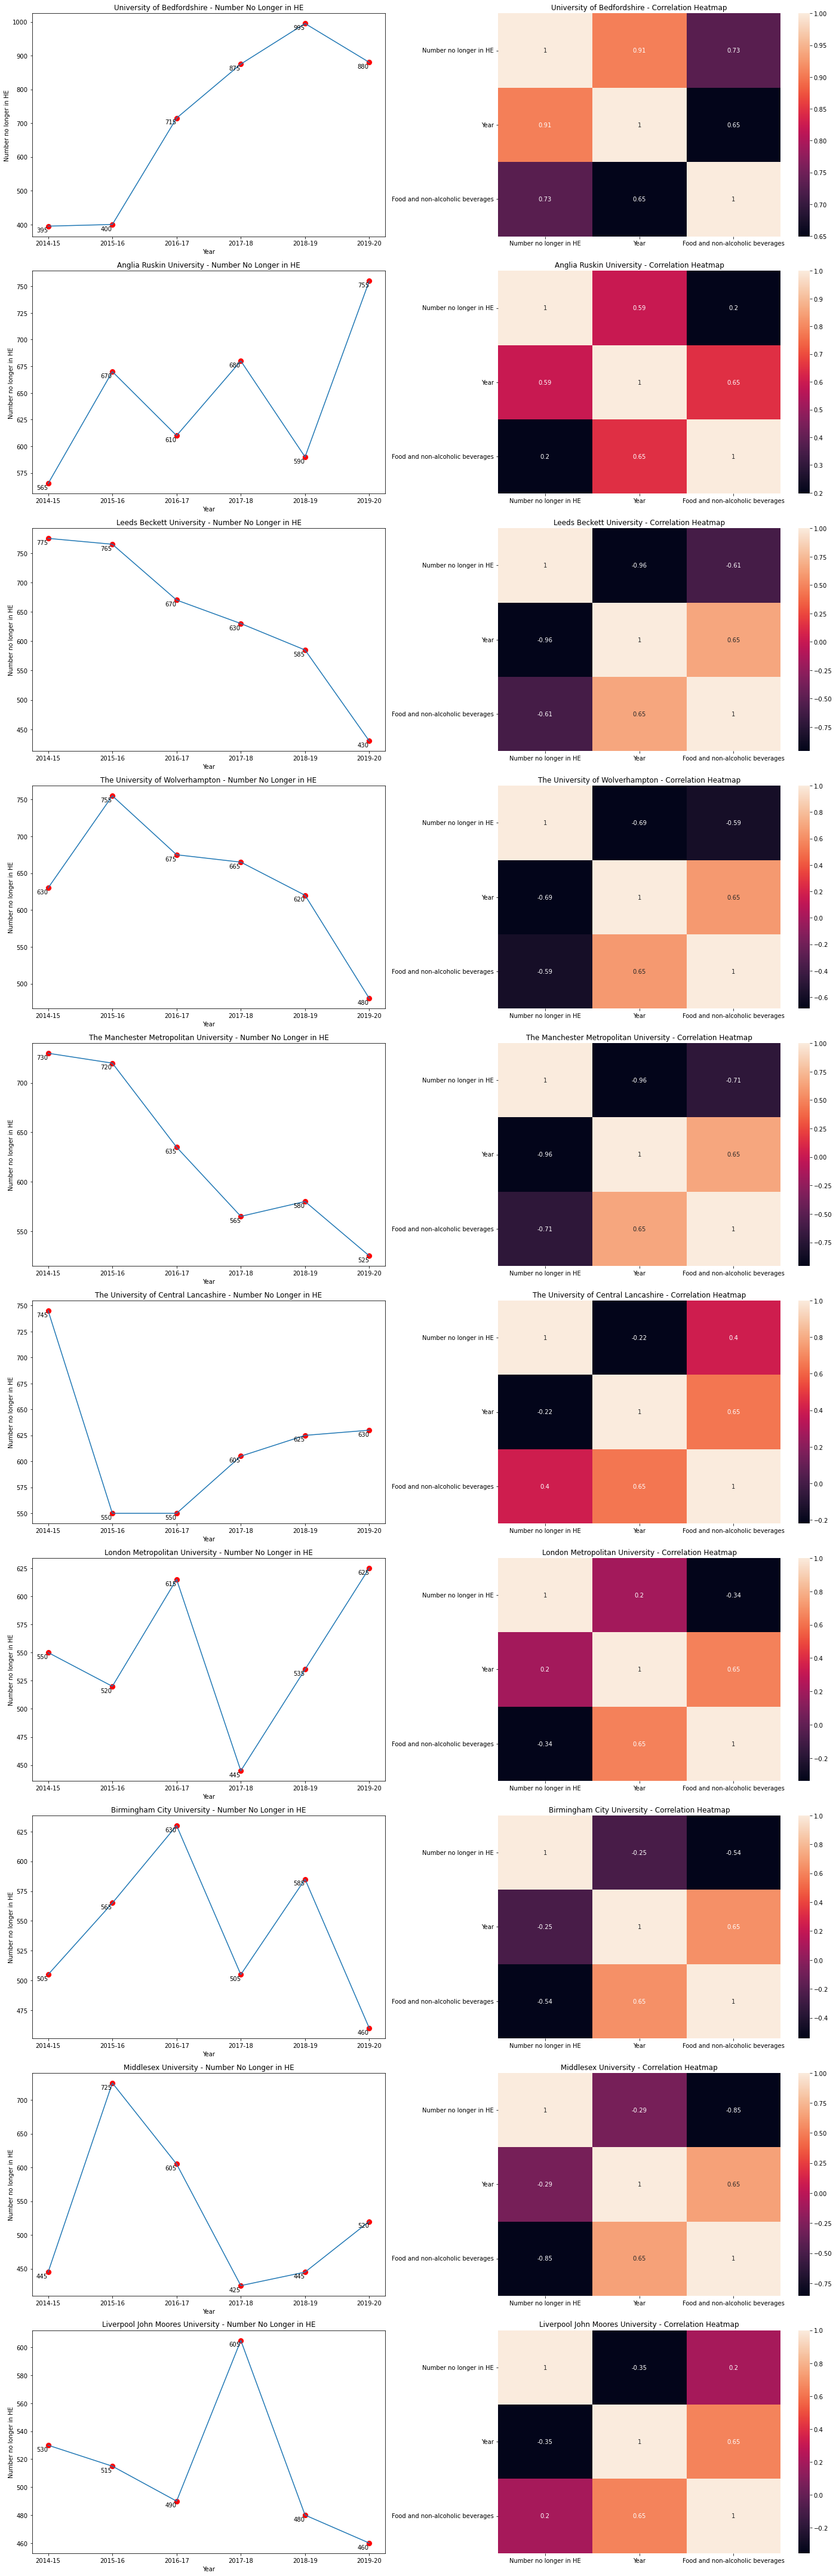

In [42]:
# Define the list of top 10 universities
df= pd.read_csv('A England.csv')
top_10_universities = [
    "University of Bedfordshire",
    "Anglia Ruskin University",
    "Leeds Beckett University",
    "The University of Wolverhampton",
    "The Manchester Metropolitan University",
    "The University of Central Lancashire",
    "London Metropolitan University",
    "Birmingham City University",
    "Middlesex University",
    "Liverpool John Moores University"
]

fig, axs = plt.subplots(10, 2, figsize=(20, 60))

# For each of the top 10 universities
for i, university in enumerate(top_10_universities):
    A = df[df['HE PROVIDER'] == university][['Number no longer in HE','Year']] 
    uni = df[df['HE PROVIDER'] == university][['Number no longer in HE','Year']] 
    year_uni = df_food_yearly_avg[2:-4]
    year_uni.set_index(uni.index, inplace=True)
    uni_clean = pd.concat([uni, year_uni], axis=1)

    # First subplot: Line plot and scatter plot
    axs[i, 0].set_title(f'{university} - Number No Longer in HE')
    sns.lineplot(x=A['Year'], y=A['Number no longer in HE'], ax=axs[i, 0])
    sns.scatterplot(x=A['Year'], y=A['Number no longer in HE'], color='red', s=100, ax=axs[i, 0])
    for x, y in zip(A['Year'], A['Number no longer in HE']):
        axs[i, 0].annotate(f'{y}', (x, y), textcoords="offset points", xytext=(-10, -10), ha='center')

    # Second subplot: Heatmap
    axs[i, 1].set_title(f'{university} - Correlation Heatmap')
    sns.heatmap(uni_clean.corr(), annot=True, ax=axs[i, 1])
    


plt.tight_layout()
plt.show()


Anglia Ruskin University      6  3870
1   The Manchester Metropolitan University      6  2790
2     The University of Central Lancashire      6  1440

In [43]:
# Define the list of top 10 universities
top_10_universities = [
    "University of Bedfordshire",
    "Anglia Ruskin University",
    "Leeds Beckett University",
    "The University of Wolverhampton",
    "The Manchester Metropolitan University",
    "The University of Central Lancashire",
    "London Metropolitan University",
    "Birmingham City University",
    "Middlesex University",
    "Liverpool John Moores University"
]

# Prepare a list to store correlation data
correlation_data = []

# For each university, calculate the correlation and store it
for university in top_10_universities:
    uni = df[df['HE PROVIDER'] == university][['Number no longer in HE','Year']]
    year_uni = df_food_yearly_avg[2:-4]
    year_uni.set_index(uni.index, inplace=True)
    uni_clean = pd.concat([uni, year_uni], axis=1)
    corr = uni_clean['Number no longer in HE'].corr(uni_clean['Food and non-alcoholic beverages'])
    correlation_data.append([university, corr])

# Convert the list to a dataframe
correlation_df = pd.DataFrame(correlation_data, columns=['University', 'Food and non-alcoholic beverages with no longer in HE Correlation'])

correlation_df


,University,Food and non-alcoholic beverages with no longer in HE Correlation
0,University of Bedfordshire,0.729758
1,Anglia Ruskin University,0.196628
2,Leeds Beckett University,-0.607650
3,The University of Wolverhampton,-0.589082
4,The Manchester Metropolitan University,-0.713220
5,The University of Central Lancashire,0.403913
6,London Metropolitan University,-0.336824
7,Birmingham City University,-0.541847
8,Middlesex University,-0.854195
9,Liverpool John Moores University,0.203497


# Result interprettion


University of Bedfordshire: The correlation is 0.729758, which is a strong positive correlation. This suggests that in the University of Bedfordshire, as the cost of food and non-alcoholic beverages increases, the number of non-continuation students also tends to increase.

Anglia Ruskin University: The correlation is 0.196628, indicating a weak positive correlation. This suggests that in Anglia Ruskin University, changes in the cost of food and non-alcoholic beverages have a weak relationship with the number of non-continuation students.

Leeds Beckett University: The correlation is -0.607650, which is a moderate negative correlation. This suggests that at Leeds Beckett University, an increase in the cost of food and non-alcoholic beverages tends to correspond with a decrease in the number of non-continuation students.

The University of Wolverhampton: The correlation is -0.589082, a moderate negative correlation. This suggests that at The University of Wolverhampton, as the cost of food and non-alcoholic beverages increases, the number of non-continuation students tends to decrease.

The Manchester Metropolitan University: The correlation is -0.713220, which is a strong negative correlation. This suggests that at The Manchester Metropolitan University, an increase in the cost of food and non-alcoholic beverages is associated with a decrease in the number of non-continuation students.

The University of Central Lancashire: The correlation is 0.403913, indicating a moderate positive correlation. This suggests that at The University of Central Lancashire, as the cost of food and non-alcoholic beverages increases, the number of non-continuation students also tends to increase.

London Metropolitan University: The correlation is -0.336824, indicating a weak negative correlation. This suggests that at London Metropolitan University, as the cost of food and non-alcoholic beverages increases, the number of non-continuation students tends to decrease, but the relationship is weak.

Birmingham City University: The correlation is -0.541847, a moderate negative correlation. This suggests that at Birmingham City University, an increase in the cost of food and non-alcoholic beverages tends to correspond with a decrease in the number of non-continuation students.

Middlesex University: The correlation is -0.854195, indicating a strong negative correlation. This suggests that at Middlesex University, as the cost of food and non-alcoholic beverages increases, the number of non-continuation students tends to significantly decrease.

Liverpool John Moores University: The correlation is 0.203497, indicating a weak positive correlation. This suggests that at Liverpool John Moores University, changes in the cost of food and non-alcoholic beverages have a weak relationship with the number of non-continuation students.

In conclusion, the correlation between the cost of food and non-alcoholic beverages and the number of non-continuation students varies among the universities. Some universities show a strong positive or negative correlation, suggesting a possible impact of food costs on student continuation, while others show weak correlations, suggesting that food costs might not be a significant factor in student continuation at those universities.







# Unemplyment rate and Food and non-alcoholic beverages result

Based on the correlations calculated between non-continuation rates at different universities and both "Food and non-alcoholic beverages rate" and "Unemployment rate", we can make the following interpretations:

Food and non-alcoholic beverages rate: Most universities have a correlation coefficient close to zero, indicating there is no significant linear relationship between the cost of food and non-alcoholic beverages and student non-continuation rates. This means changes in the prices of food and non-alcoholic beverages do not strongly influence the number of students who choose to discontinue their studies.

Unemployment rate: The correlation coefficients vary more widely here. Some universities show a strong negative correlation (like University of Bedfordshire with -0.900903), implying that as unemployment decreases, the non-continuation rates increase. On the other hand, some universities show a positive correlation (like The Manchester Metropolitan University with 0.753797), suggesting that higher unemployment rates correspond to higher non-continuation rates.

In [26]:
# Load the data
df = pd.read_csv("A England.csv")

# Group the data by university and calculate the sum of 'Number no longer in HE' for each university
university_churn_totals = df.groupby('HE PROVIDER')['Number no longer in HE'].sum()

# Sort the totals in descending order and select the top 100
top_100_universities = university_churn_totals.sort_values(ascending=False).head(100).index.tolist()

# Prepare a list to store correlation data
correlation_data = []

# For each university, calculate the correlation and store it
for university in top_100_universities:
    uni = df[df['HE PROVIDER'] == university][['Number no longer in HE','Year']]
    # Convert 'Year' in 'uni' to the starting year of the academic year
    uni['Year'] = uni['Year'].str.slice(0, 4).astype(int)
    year_uni = df_food_yearly_avg[2:-4]
    # Merge the dataframes using an inner join
    uni_clean = pd.merge(uni, year_uni, on='Year', how='inner')
    corr = uni_clean['Number no longer in HE'].corr(uni_clean['Food and non-alcoholic beverages'])
    correlation_data.append([university, corr])

# Convert the list to a dataframe
correlation_df = pd.DataFrame(correlation_data, columns=['University', 'Food and non-alcoholic beverages with no longer in HE Correlation'])

correlation_df


,University,Food and non-alcoholic beverages with no longer in HE Correlation
0,University of Bedfordshire,0.729758
1,Anglia Ruskin University,0.196628
2,Leeds Beckett University,-0.607650
3,The University of Wolverhampton,-0.589082
4,The Manchester Metropolitan University,-0.713220
...,...,...
95,Newman University,-0.743586
96,University College Birmingham,-0.741751
97,University of Durham,-0.075349
98,Southampton Solent University,1.000000


In [27]:
len(correlation_df[correlation_df['Food and non-alcoholic beverages with no longer in HE Correlation'] > 0.6])

15

A correlation value of 0.6 or higher indicates a relatively strong positive linear relationship between the 'Food and non-alcoholic beverages' rate and the number of students no longer in higher education for the selected universities. The fact that we have 15 out of 100 universities with a correlation higher than 0.6 suggests that there is a significant positive association between these two variables for these particular universities.

A correlation value of 1.0 indicates a perfect positive linear relationship, meaning that as the 'Food and non-alcoholic beverages' rate increases, the number of students no longer in higher education also increases proportionally. While the correlations you have found may not be perfect, they still suggest a clear positive trend between these variables.

To gain deeper insights, it may be helpful to investigate the potential reasons behind this correlation. For example, it could be that universities with higher 'Food and non-alcoholic beverages' rates tend to have a certain demographic of students who are more likely to leave higher education for various reasons. Additional data and analysis would be required to draw more definitive conclusions about the factors influencing non-continuation rates in these universities.